#  BINARY CLASSIFICATION PART

In [1]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from scipy.stats import randint as sp_randint
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score ,f1_score,roc_curve, auc,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE


# to display all column of datapoints
pd.set_option('display.max_columns', None)



# i) Binary Classification Problem

In [2]:
""" Reload the cleaned datasets """

df_train=pd.read_csv("cleaned_train.csv")

df_test=pd.read_csv("cleaned_test.csv")

In [3]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
df_train.shape

(950470, 42)

In [5]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,udp,domain_u,SF,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.0,0.0,0.5,1.0,0.00,10,3,0.30,0.30,0.30,0.00,0.00,0.0,0.00,0.00,normal.
1,0,tcp,http,SF,223,185,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.00,71,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
2,0,tcp,http,SF,230,260,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,19,0.0,0.0,0.0,0.0,1.0,0.0,0.11,3,255,1.00,0.00,0.33,0.07,0.33,0.0,0.00,0.00,normal.
3,1,tcp,smtp,SF,3170,329,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.00,54,39,0.72,0.11,0.02,0.00,0.02,0.0,0.09,0.13,normal.
4,0,tcp,http,SF,297,13787,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,177,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.


In [6]:
df_test.shape

(66436, 42)

In [7]:
""" In the below code we have basically divided the intrusions based signal as 1 and non intrusion based signal as 0 
and storing the values into a newly created column class_label_bi for both the train and the test dataframe """

df_train['class_label_bi'] = df_train.class_label.apply(lambda x: 0 if x == 'normal.' else 1)
df_test['class_label_bi'] = df_test.class_label.apply(lambda x: 0 if x == 'normal.' else 1)

In [8]:
#Droping the class label from main dataset

df_train=df_train.drop(['class_label'], axis = 1)

df_test=df_test.drop(['class_label'], axis = 1)

# Features Engineering and Modeling

## Part 1 (Without Over Sampling or Under Sampling the Data)

### Label Encoding catagorical or discrete features


In [9]:

def label_encoding(X_train,X_test,feature):
    
    #LabelEncoder() function Encode target labels with value between 0 and n_classes-1
    le = LabelEncoder()
    
    data1= le.fit_transform(X_train[feature].values)
    
    data2= le.fit_transform(X_test[feature].values)
    
    return data1,data2
    


In [10]:
# protocol
X_train_protocol_type , X_test_protocol_type = label_encoding(df_train,df_test,'protocol_type')

#service
X_train_service , X_test_service = label_encoding(df_train,df_test,'service')

#flag
X_train_flag , X_test_flag = label_encoding(df_train,df_test,'flag')

In [11]:
continuous_features=["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]



In [12]:
#Storing all the continuous features in the x_train and x_test

X_train = df_train[continuous_features]

X_test = df_test[continuous_features]


In [13]:
#storing encoded values into x_train and x_test

X_train['protocol_type'] = X_train_protocol_type
X_train['service'] = X_train_service
X_train['flag'] = X_train_flag

X_test['protocol_type'] = X_test_protocol_type
X_test['service'] = X_test_service
X_test['flag'] = X_test_flag


In [14]:
#storing class_label value into y_train and y_test

y_train=df_train['class_label_bi']

y_test=df_test['class_label_bi']

In [15]:
X_train.shape , X_test.shape

((950470, 35), (66436, 35))

In [16]:
y_train.shape , y_test.shape

((950470,), (66436,))

### Modeling

In [17]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    
    # C = 2,2  matrix, each cell (i,j) represents number of points of class i are predicted class j
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    B =(C/C.sum(axis=0))
    
    
    labels = [0,1]
    cmap=sns.light_palette("green")
    
    #Confusion matrix
    
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Precision matrix

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    #Recall matrix
    
    
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [19]:
def hyperparameter_of_the_model(model,parameters,X_train,y_train):
    
    #use gridsearch to test all values
    clf = RandomizedSearchCV(model, 
                             parameters, 
                             n_iter=5,
                             cv=10 , 
                             refit = True, 
                             verbose = 3, 
                             scoring='roc_auc',
                             return_train_score=True,
                             n_jobs=-1)
    
    
    #fit model to data
    clf.fit(X_train, y_train)
    
    #find the best tuned parameters
    best_parameter=clf.best_estimator_
    print("Best hyper parameter of the model is " , best_parameter)
   

# Logistic regression

### Find the best hyper parameter

In [20]:
#Parameter input values
parameters = {
    'C': [0.00001,0.0001, 0.001,0.01,0.1,1,5,10,50,100],
    'max_iter': list(range(100,800,100))
}

#model input
model = LogisticRegression()

hyperparameter_of_the_model(model,parameters,X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  LogisticRegression(C=0.001, max_iter=300)


### Train the model with best parameters

In [21]:
#train with best hyperparameters
final_model=LogisticRegression(C=0.001, max_iter=300)

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_without_sampling.joblib')

['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_without_sampling.joblib']

In [22]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [23]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9479371824649093
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.7843064451251587


In [24]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.9951934753985197
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9668904485810192


In [25]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9049653304505008
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.659726198532091


In [26]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

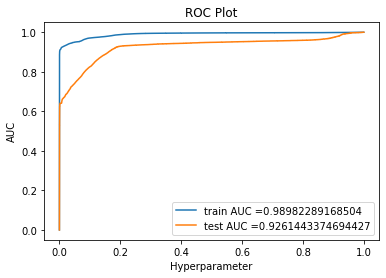

In [27]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


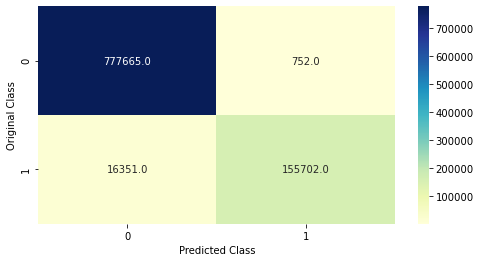

-------------------- Precision matrix (Columm Sum=1) --------------------


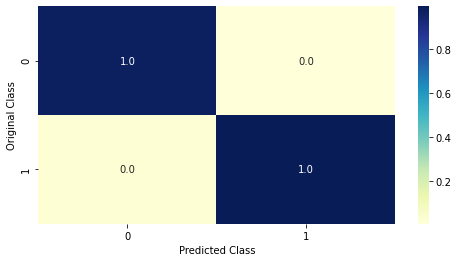

-------------------- Recall matrix (Row sum=1) --------------------


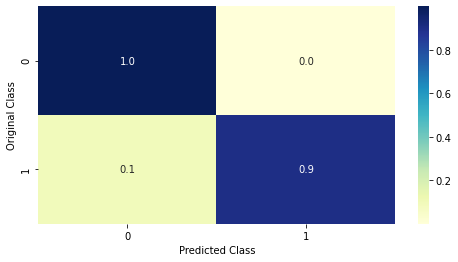

In [28]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)



 Test confusion matrix 
-------------------- Confusion matrix --------------------


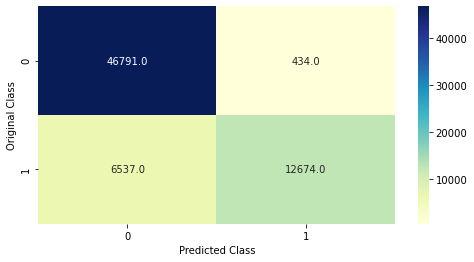

-------------------- Precision matrix (Columm Sum=1) --------------------


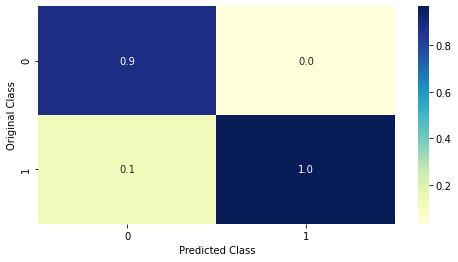

-------------------- Recall matrix (Row sum=1) --------------------


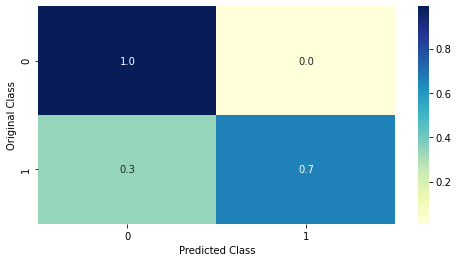

In [29]:
print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [31]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_without_sampling.joblib')

In [32]:
sorted_idx = np.argsort(final_model.coef_[0])[::-1] 

for index in sorted_idx:
    print([X_train.columns[index], final_model.coef_[0][index]]) 


['count', 0.08615768856868268]
['srv_serror_rate', 0.002796436425575735]
['serror_rate', 0.0027829676209802996]
['dst_host_serror_rate', 0.0027664491204987584]
['dst_host_srv_serror_rate', 0.002758326099646544]
['dst_host_count', 0.0011172192607622686]
['srv_rerror_rate', 0.000636681203764037]
['rerror_rate', 0.0006283084828844059]
['dst_host_srv_rerror_rate', 0.0005918282295521108]
['dst_host_rerror_rate', 0.0005622038706289373]
['wrong_fragment', 0.0005220871566255778]
['dst_host_srv_diff_host_rate', 0.00014833725725436558]
['duration', 1.8869867691265513e-05]
['num_failed_logins', 6.70417806361512e-06]
['dst_bytes', 1.2651553114457752e-07]
['src_bytes', 7.312607251841262e-08]
['num_outbound_cmds', 0.0]
['urgent', -2.8327835349498716e-06]
['num_shells', -1.0345739674987227e-05]
['num_access_files', -3.8837358050553624e-05]
['srv_diff_host_rate', -8.047020589677838e-05]
['diff_srv_rate', -0.00011717141117002279]
['num_file_creations', -0.00018775714347176112]
['hot', -0.00021176081844

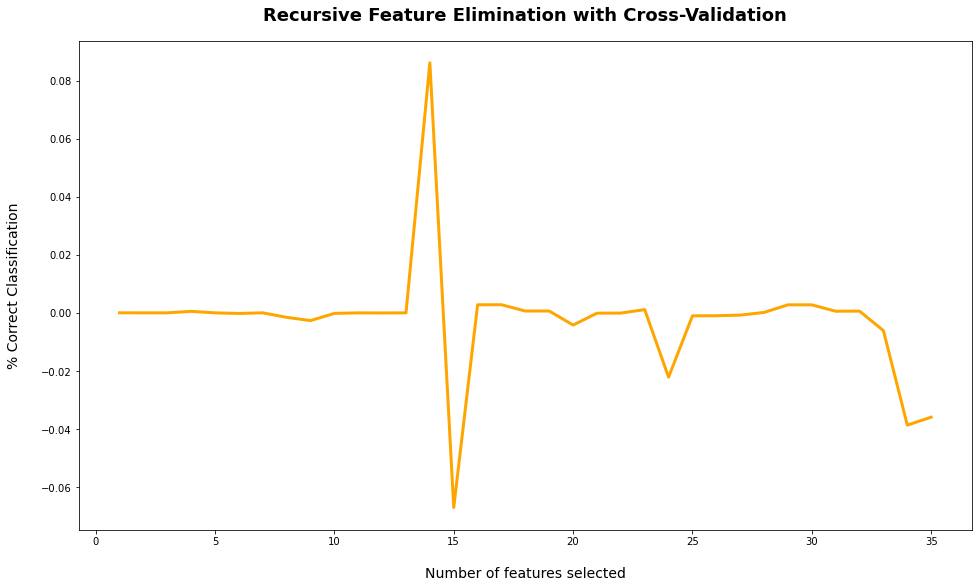

In [33]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.coef_[0]) + 1), final_model.coef_[0], color='orange', linewidth=3)
plt.show()


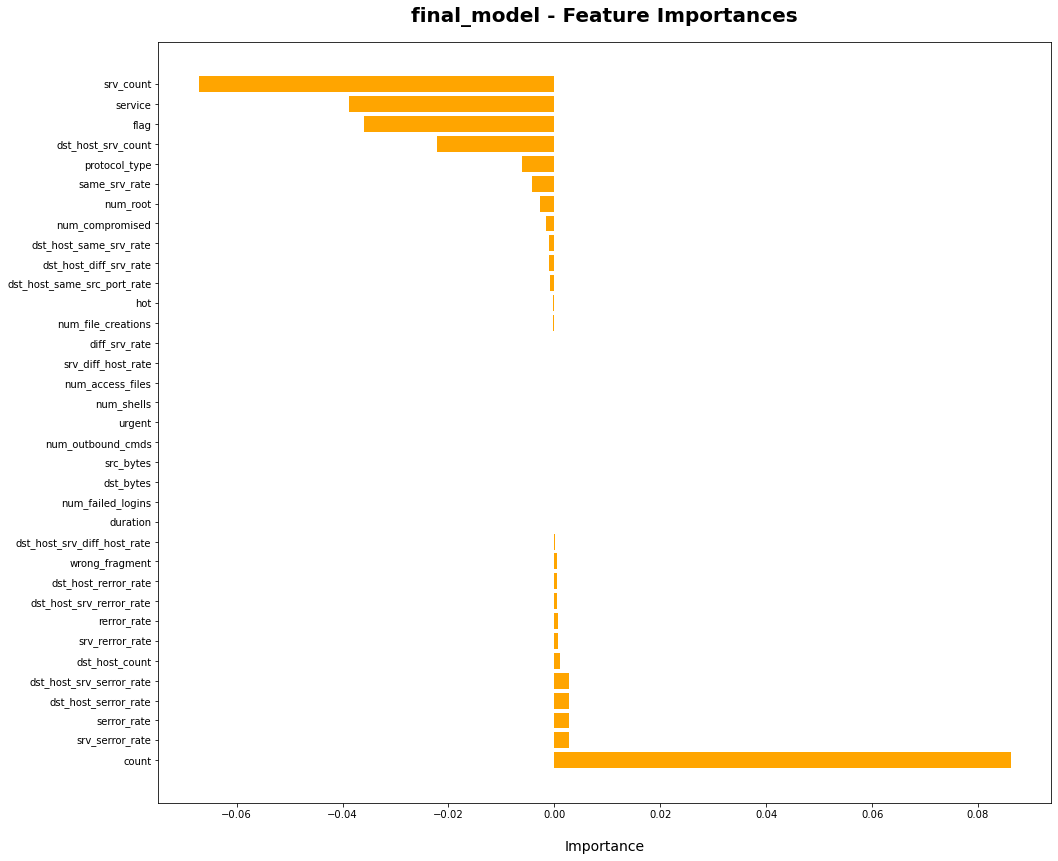

In [34]:

#[X_train.columns[index], final_model.coef_[0][index]]

dset = pd.DataFrame()
dset['Feature'] = X_train.columns

dset['importance'] = final_model.coef_[0]

dset = dset.sort_values(by='importance', ascending=False)
#print(dset.attr)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['Feature'], width=dset['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [30]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 1
Predicted Class : 0


In [31]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

# Random Forest 

### Find the best hyper parameter

In [32]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=RandomForestClassifier()

hyperparameter_of_the_model(model,parameters,X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  RandomForestClassifier(max_depth=13, min_samples_leaf=36, min_samples_split=128,
                       n_estimators=115)


### Train the model with best parameters

In [33]:
#train with best hyperparameters
final_model=RandomForestClassifier(max_depth=13, min_samples_leaf=36, min_samples_split=128,n_estimators=115)

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_without_sampling.joblib')

['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_without_sampling.joblib']

In [34]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [35]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9976414132884521
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.8578051643192488


In [36]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.9996207103802817
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9830519873562445


In [37]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9956699389141718
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.760866170423195


In [38]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

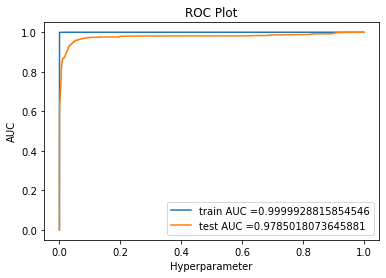

In [39]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


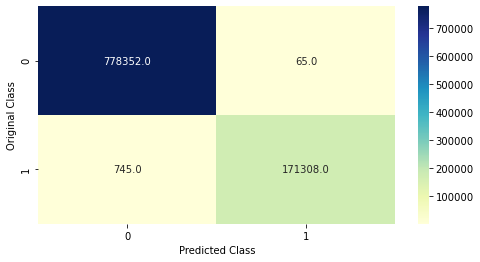

-------------------- Precision matrix (Columm Sum=1) --------------------


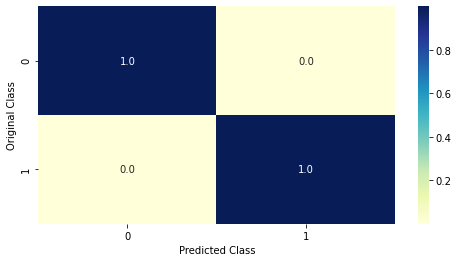

-------------------- Recall matrix (Row sum=1) --------------------


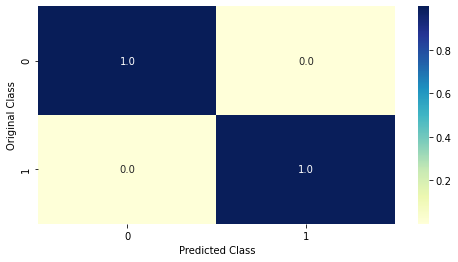

In [40]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


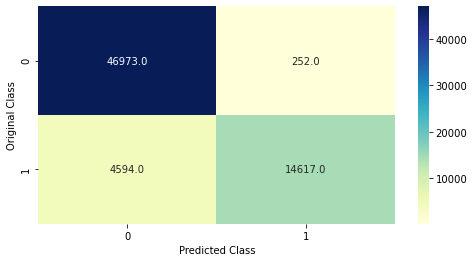

-------------------- Precision matrix (Columm Sum=1) --------------------


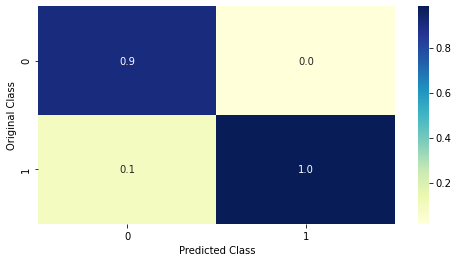

-------------------- Recall matrix (Row sum=1) --------------------


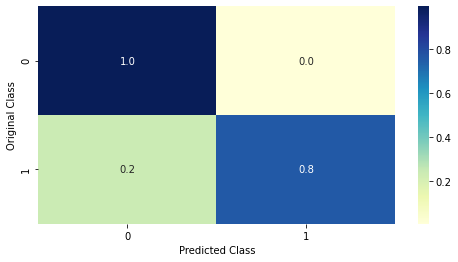

In [41]:
print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [27]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_without_sampling.joblib')

In [28]:
sorted_idx = np.argsort(final_model.feature_importances_)[::-1]

for index in sorted_idx:
    print([X_train.columns[index], final_model.feature_importances_[index]]) 


['same_srv_rate', 0.18063766470091008]
['count', 0.13373348762717985]
['diff_srv_rate', 0.10571446373097508]
['src_bytes', 0.1047296421452712]
['dst_host_serror_rate', 0.05686458461835634]
['serror_rate', 0.05673806482482605]
['flag', 0.051025842277308185]
['dst_host_srv_serror_rate', 0.04942283758323173]
['srv_serror_rate', 0.043309896855425085]
['dst_bytes', 0.0373516555389484]
['dst_host_diff_srv_rate', 0.032202855310807604]
['dst_host_srv_count', 0.02671164381328163]
['dst_host_same_srv_rate', 0.02596917371344739]
['service', 0.014909381750599715]
['protocol_type', 0.012531458618327483]
['dst_host_count', 0.0114008121217473]
['dst_host_same_src_port_rate', 0.010556044916189045]
['srv_count', 0.00904131684818201]
['dst_host_srv_diff_host_rate', 0.008832718262205372]
['dst_host_rerror_rate', 0.007733572509712322]
['dst_host_srv_rerror_rate', 0.004923186981462999]
['rerror_rate', 0.004652868539336772]
['srv_rerror_rate', 0.0035680615675201793]
['wrong_fragment', 0.002702431584396748]


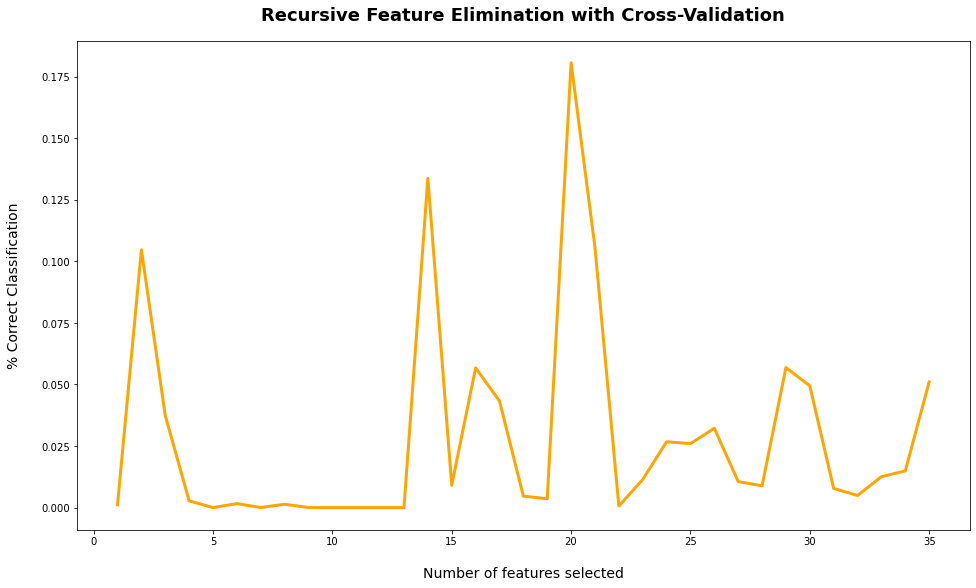

In [29]:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.feature_importances_) + 1), final_model.feature_importances_, color='orange', linewidth=3)
plt.show()



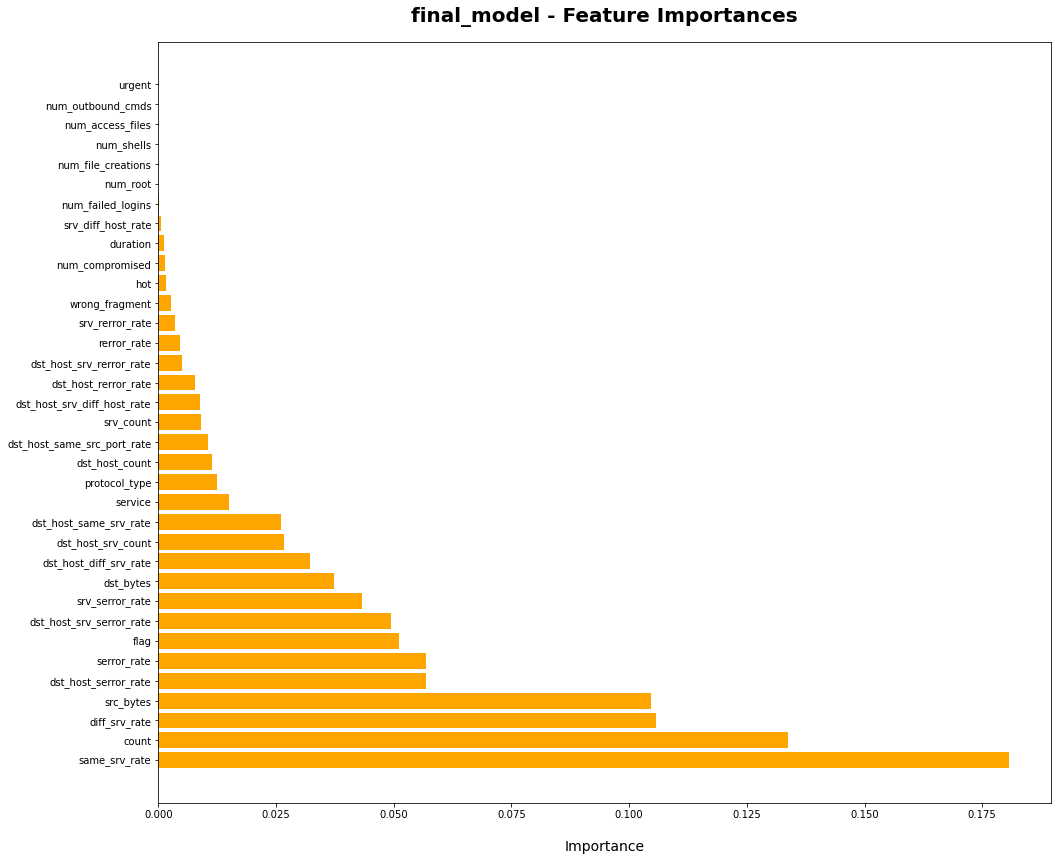

In [30]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.feature_importances_

df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [42]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])



Actual Class : 1
Predicted Class : 0


In [43]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

# XGBOOST 

### Find the best hyper parameter

In [44]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=xgb.XGBClassifier()

hyperparameter_of_the_model(model,parameters,X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[04:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best hyper parameter of the model is  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain

### Train the model with best parameters

In [45]:
#train with best hyperparameters
final_model=xgb.XGBClassifier(n_estimators=121,max_depth=11,min_samples_split=156,min_samples_leaf=40)  

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_without_sampling.joblib')

[04:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_without_sampling.joblib']

In [46]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [47]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9999825637150911
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.8823563119592001


In [48]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.9999709398629524
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9813268752788222


In [49]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9999941878374687
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.8015199625214721


In [50]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

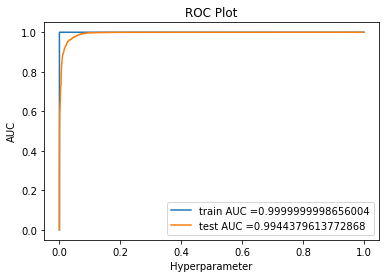

In [51]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


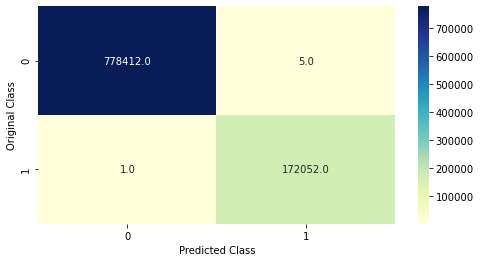

-------------------- Precision matrix (Columm Sum=1) --------------------


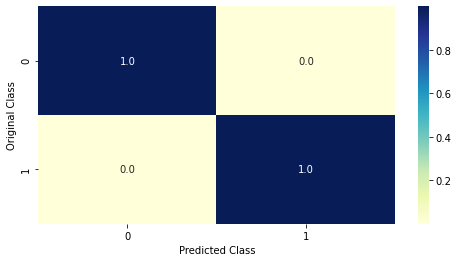

-------------------- Recall matrix (Row sum=1) --------------------


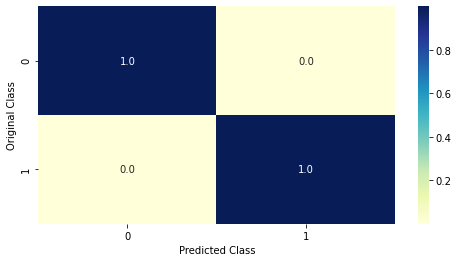

In [52]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


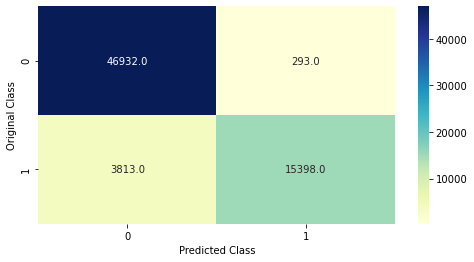

-------------------- Precision matrix (Columm Sum=1) --------------------


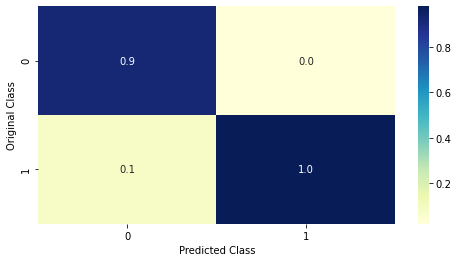

-------------------- Recall matrix (Row sum=1) --------------------


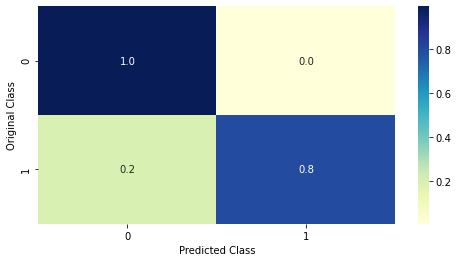

In [53]:

print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [35]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_without_sampling.joblib')


In [36]:
sorted_idx = np.argsort(final_model.feature_importances_)[::-1]

for index in sorted_idx:
    print([X_train.columns[index], final_model.feature_importances_[index]]) 


['same_srv_rate', 0.9087027]
['wrong_fragment', 0.0237163]
['protocol_type', 0.018473173]
['srv_serror_rate', 0.015826985]
['dst_host_srv_serror_rate', 0.0079627065]
['serror_rate', 0.0052432246]
['srv_count', 0.0047216867]
['num_compromised', 0.004406787]
['src_bytes', 0.001760783]
['service', 0.00156952]
['dst_host_same_srv_rate', 0.001263488]
['num_failed_logins', 0.0010936337]
['duration', 0.00093749695]
['hot', 0.0007597991]
['dst_bytes', 0.00045314358]
['dst_host_serror_rate', 0.00038674448]
['dst_host_diff_srv_rate', 0.0003725648]
['dst_host_same_src_port_rate', 0.00034079386]
['dst_host_rerror_rate', 0.00025626284]
['num_shells', 0.00025620204]
['dst_host_srv_rerror_rate', 0.00022331398]
['dst_host_srv_count', 0.00017757855]
['rerror_rate', 0.00017295138]
['count', 0.00016956274]
['dst_host_count', 0.00015775481]
['flag', 0.000145126]
['num_root', 0.00010077076]
['dst_host_srv_diff_host_rate', 8.548651e-05]
['num_file_creations', 7.700743e-05]
['diff_srv_rate', 7.15953e-05]
['s

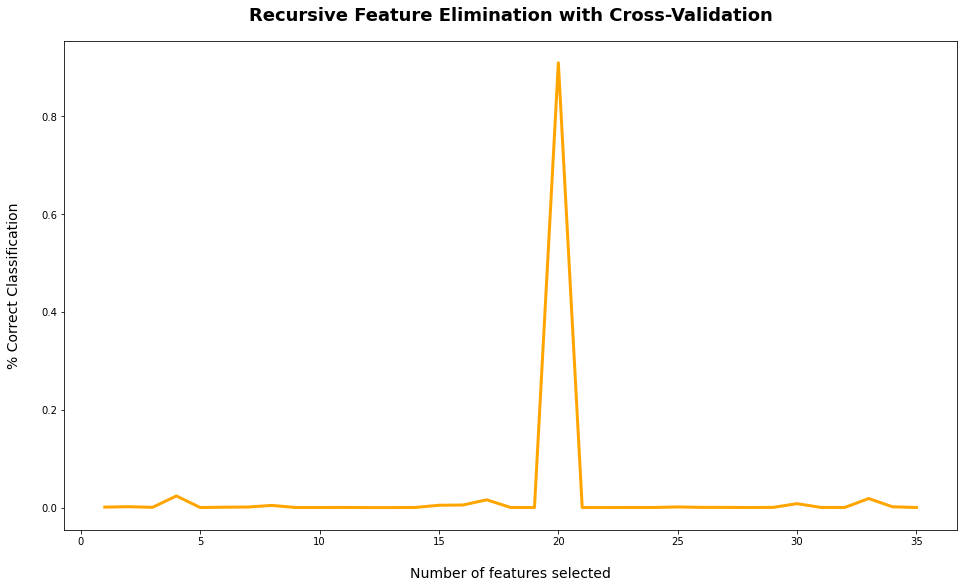

In [37]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.feature_importances_) + 1), final_model.feature_importances_, color='orange', linewidth=3)
plt.show()


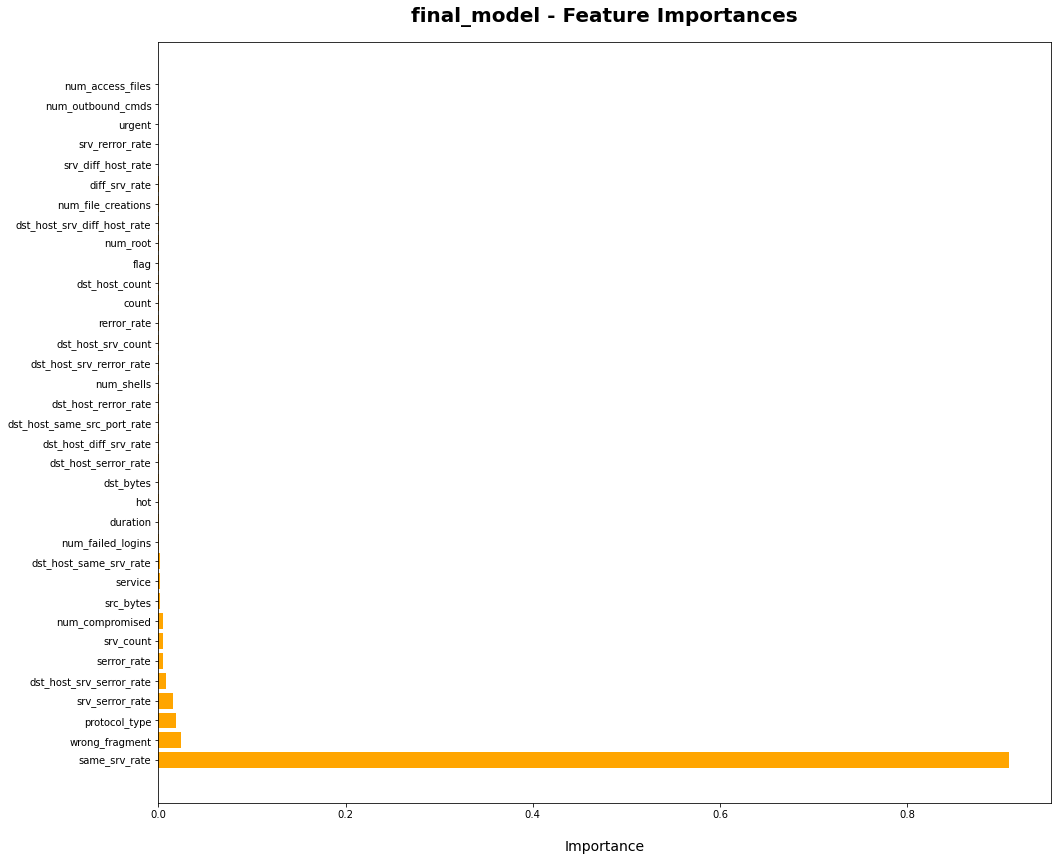

In [38]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.feature_importances_

df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [54]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 1
Predicted Class : 0


In [55]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

## Part 2 Under Sampling 

In [39]:
# protocol
X_train_protocol_type , X_test_protocol_type = label_encoding(df_train,df_test,'protocol_type')

#service
X_train_service , X_test_service = label_encoding(df_train,df_test,'service')

#flag
X_train_flag , X_test_flag = label_encoding(df_train,df_test,'flag')

In [40]:
continuous_features=["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]



In [41]:
y = df_train['class_label_bi'] 
x = df_train[continuous_features]

In [42]:
x.shape , y.shape

((950470, 32), (950470,))

In [43]:
x['protocol_type'] = X_train_protocol_type
x['service'] = X_train_service
x['flag'] = X_train_flag


In [44]:
x.shape , y.shape

((950470, 35), (950470,))

In [45]:
from collections import Counter

Counter(y)

Counter({0: 778417, 1: 172053})

In [18]:
from imblearn.under_sampling import NearMiss

nm=NearMiss()

X_train_nm,y_train_nm=nm.fit_resample(x,y)


In [19]:

print("The number of classes before fit {}".format(Counter(y)))

print("The number of classes after fit {}".format(Counter(y_train_nm)))


The number of classes before fit Counter({0: 778417, 1: 172053})
The number of classes after fit Counter({0: 172053, 1: 172053})


In [20]:
X_train_nm.shape , y_train_nm.shape

((344106, 35), (344106,))

In [21]:
X_train_nm['class_label_bi'] = y_train_nm

In [22]:
X_train_nm.shape

(344106, 36)

In [23]:
X_train_nm.to_csv("under_sample_train.csv", index=False)


In [47]:
""" Reload the cleaned datasets """

df_train2=pd.read_csv("under_sample_train.csv")

In [48]:
df_train2.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class_label_bi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1,5,1.0,0.0,1.0,1.0,1.0,1.00,0.0,0.0,1,18,5,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1,4,1.0,0.0,1.0,1.0,1.0,1.00,0.0,0.0,1,18,5,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1,3,1.0,0.0,1.0,1.0,1.0,1.00,0.0,0.0,1,18,5,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1,2,1.0,0.0,1.0,1.0,1.0,1.00,0.0,0.0,1,18,5,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,6,1.0,0.0,1.0,0.5,1.0,0.17,0.0,0.0,1,18,5,0


In [49]:
df_train2.shape

(344106, 36)

In [50]:
y_train=df_train2['class_label_bi']

X_train=df_train2.drop(['class_label_bi'], axis = 1)

In [51]:
X_test = df_test[continuous_features]

In [52]:
X_test['protocol_type'] = X_test_protocol_type
X_test['service'] = X_test_service
X_test['flag'] = X_test_flag


In [53]:
y_test=df_test['class_label_bi']

In [54]:
X_test.shape , y_test.shape

((66436, 35), (66436,))

### Modeling

In [64]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    
    # C = 2,2  matrix, each cell (i,j) represents number of points of class i are predicted class j
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    B =(C/C.sum(axis=0))
    
    
    labels = [0,1]
    cmap=sns.light_palette("green")
    
    #Confusion matrix
    
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Precision matrix

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    #Recall matrix
    
    
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [65]:
def hyperparameter_of_the_model(model,parameters,X_train,y_train):
    
    #use gridsearch to test all values
    clf = RandomizedSearchCV(model, 
                             parameters, 
                             n_iter=5,
                             cv=10 , 
                             refit = True, 
                             verbose = 3, 
                             scoring='roc_auc',
                             return_train_score=True,
                             n_jobs=-1)
    
    
    #fit model to data
    clf.fit(X_train, y_train)
    
    #find the best tuned parameters
    best_parameter=clf.best_estimator_
    print("Best hyper parameter of the model is " , best_parameter)
   

# Logistic regression

### Find the best hyper parameter

In [66]:
#Parameter input values
parameters = {
    'C': [0.00001,0.0001, 0.001,0.01,0.1,1,5,10,50,100],
    'max_iter': list(range(100,800,100))
}

#model input
model = LogisticRegression()

hyperparameter_of_the_model(model,parameters,X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  LogisticRegression(C=100, max_iter=600)


### Train the model with best parameters

In [67]:
#train with best hyperparameters
final_model=LogisticRegression(C=100, max_iter=600)

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_under_sampling.joblib')

['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_under_sampling.joblib']

In [68]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [69]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9641021998058299
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.8357902757832419


In [70]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.982297415482976
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.956338028169014


In [71]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9465687898496393
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.7422310134818594


In [72]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

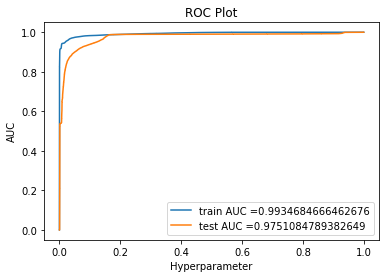

In [73]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


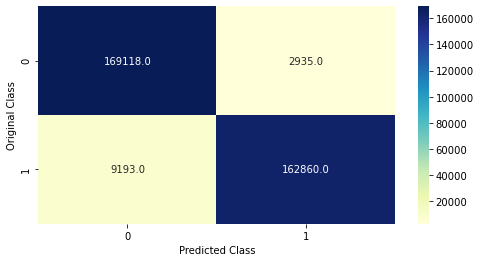

-------------------- Precision matrix (Columm Sum=1) --------------------


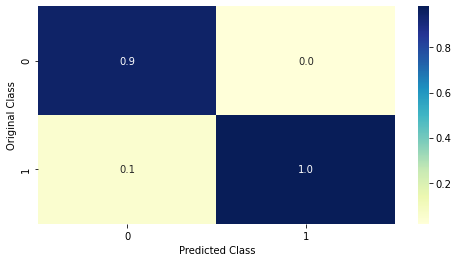

-------------------- Recall matrix (Row sum=1) --------------------


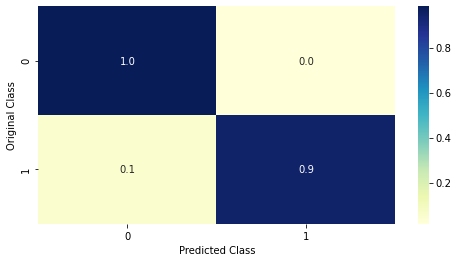

In [74]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


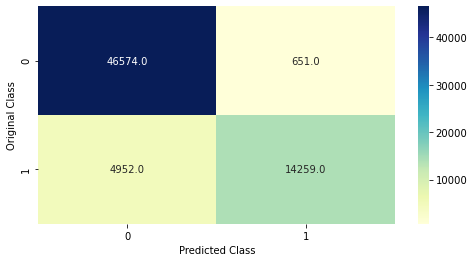

-------------------- Precision matrix (Columm Sum=1) --------------------


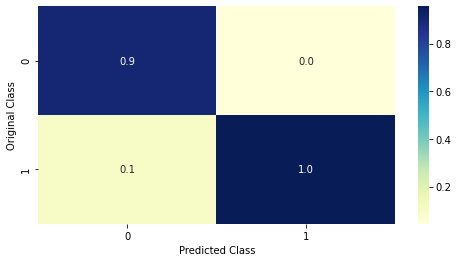

-------------------- Recall matrix (Row sum=1) --------------------


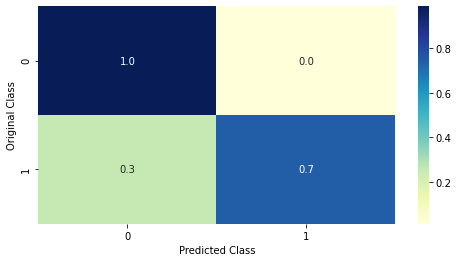

In [75]:
print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [55]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_under_sampling.joblib')

In [56]:
sorted_idx = np.argsort(final_model.coef_[0])[::-1] 

for index in sorted_idx:
    print([X_train.columns[index], final_model.coef_[0][index]]) 


['hot', 1.3430542167385764]
['srv_serror_rate', 0.7791451207541215]
['dst_host_serror_rate', 0.7757000963651008]
['serror_rate', 0.7750806677732103]
['dst_host_srv_serror_rate', 0.7570491503180357]
['dst_host_same_src_port_rate', 0.42926549702823785]
['wrong_fragment', 0.4076374336362554]
['srv_diff_host_rate', 0.3515440141254563]
['dst_host_srv_diff_host_rate', 0.22779481115038572]
['dst_host_same_srv_rate', 0.05061331109983147]
['count', 0.04011502554619655]
['service', 0.033454561428739975]
['num_compromised', 0.029695006990385058]
['num_file_creations', 0.010343387035112766]
['num_failed_logins', 0.006002429200841762]
['dst_host_count', 0.002547835309415984]
['num_shells', 0.0017463637880598126]
['num_access_files', 0.0006253413659743606]
['urgent', 0.0004200706189668504]
['src_bytes', 7.834324793383868e-05]
['duration', 7.793631941187514e-05]
['dst_bytes', 3.0475393063272348e-06]
['num_outbound_cmds', 0.0]
['dst_host_srv_count', -0.010518159799876184]
['diff_srv_rate', -0.01057058

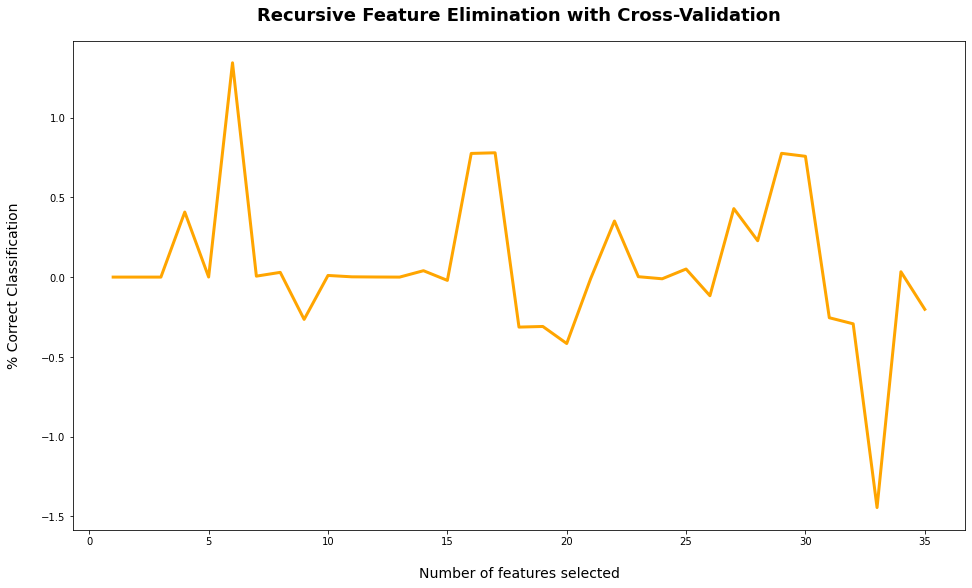

In [57]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.coef_[0]) + 1), final_model.coef_[0], color='orange', linewidth=3)
plt.show()


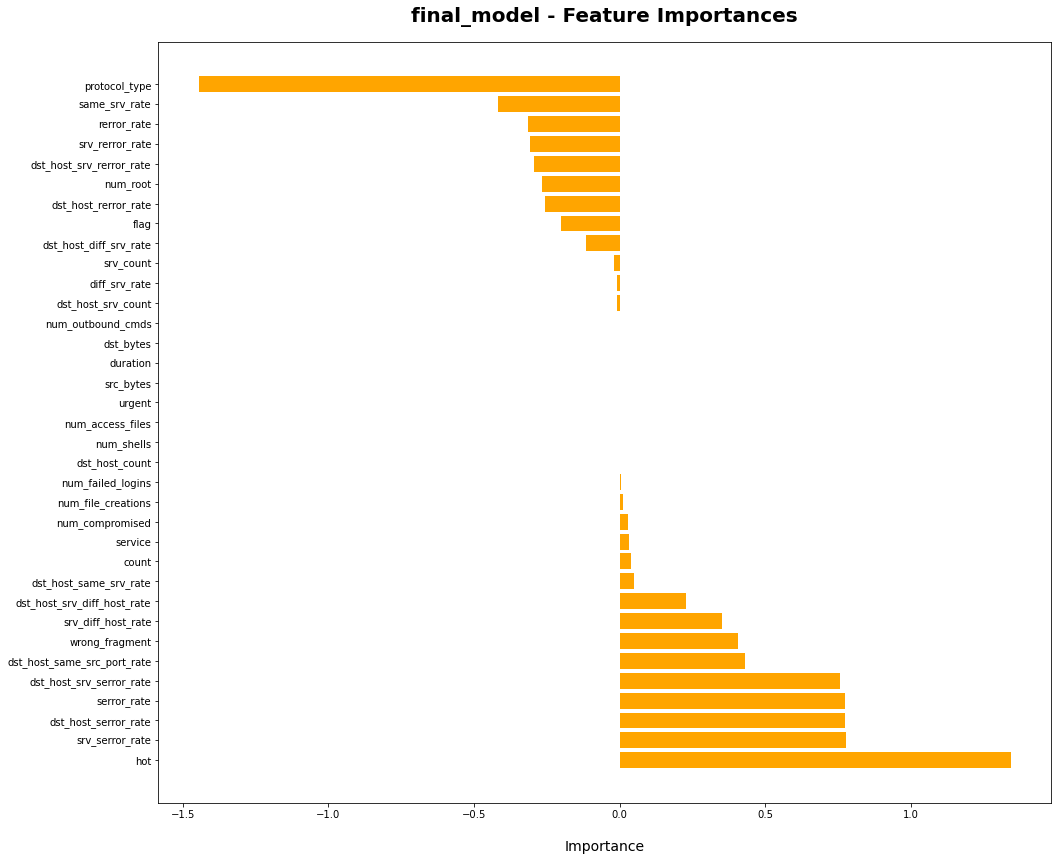

In [58]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.coef_[0]
df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [76]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 1
Predicted Class : 0


In [77]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

# Random Forest 

### Find the best hyper parameter

In [78]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=RandomForestClassifier()

hyperparameter_of_the_model(model,parameters,X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  RandomForestClassifier(max_depth=12, min_samples_leaf=57, min_samples_split=137,
                       n_estimators=110)


### Train the model with best parameters

In [79]:
#train with best hyperparameters
final_model=RandomForestClassifier(max_depth=12, min_samples_leaf=57, min_samples_split=137,n_estimators=110)

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_under_sampling.joblib')

['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_under_sampling.joblib']

In [80]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [81]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9976562659221065
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.8758479346476922


In [82]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.9995099640640314
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9830870917573873


In [83]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9958094308149233
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.789703815522357


In [84]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

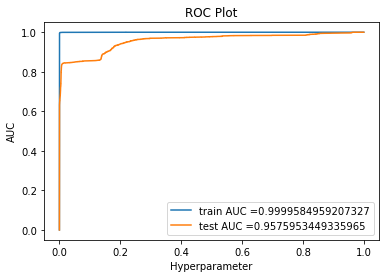

In [85]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


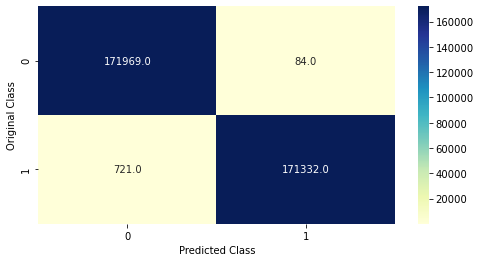

-------------------- Precision matrix (Columm Sum=1) --------------------


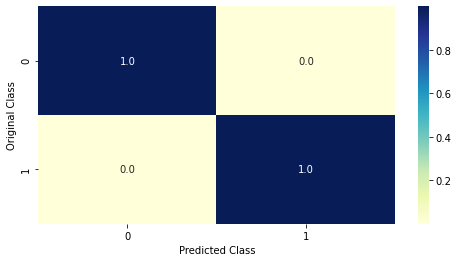

-------------------- Recall matrix (Row sum=1) --------------------


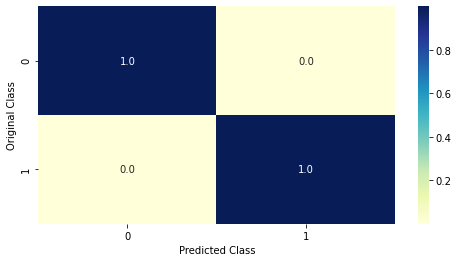

In [86]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


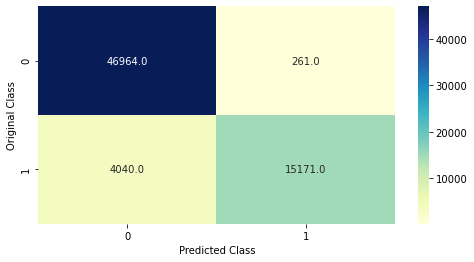

-------------------- Precision matrix (Columm Sum=1) --------------------


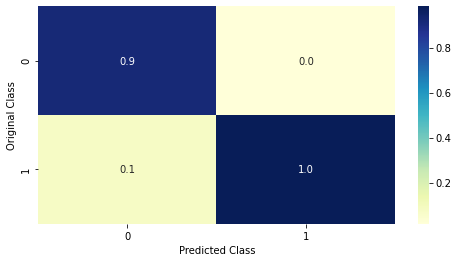

-------------------- Recall matrix (Row sum=1) --------------------


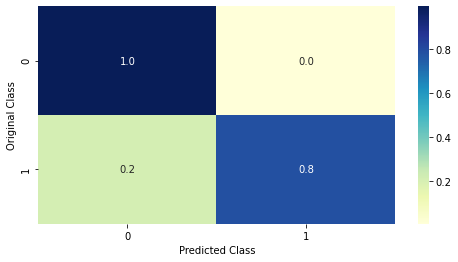

In [87]:
print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [59]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_under_sampling.joblib')

In [60]:
sorted_idx = np.argsort(final_model.feature_importances_)[::-1]

for index in sorted_idx:
    print([X_train.columns[index], final_model.feature_importances_[index]]) 


['diff_srv_rate', 0.1409987227494879]
['same_srv_rate', 0.11777761534506488]
['count', 0.11499244299078994]
['serror_rate', 0.10473721884300477]
['dst_host_same_srv_rate', 0.057277827024803364]
['src_bytes', 0.056177239763950226]
['dst_host_serror_rate', 0.05191744257348833]
['flag', 0.04269584469700814]
['dst_bytes', 0.03621147465938852]
['dst_host_srv_count', 0.03398055247278173]
['srv_serror_rate', 0.03227565723120164]
['dst_host_srv_serror_rate', 0.03200569184420871]
['protocol_type', 0.023912862945222494]
['dst_host_same_src_port_rate', 0.023629314563923393]
['dst_host_diff_srv_rate', 0.02191779301918834]
['dst_host_srv_diff_host_rate', 0.020986658835441253]
['service', 0.019555561131812317]
['dst_host_rerror_rate', 0.01523143591211266]
['dst_host_count', 0.014935100495196241]
['srv_count', 0.012143378130723104]
['dst_host_srv_rerror_rate', 0.007882012826235732]
['rerror_rate', 0.004596301923116649]
['wrong_fragment', 0.0037432570564793354]
['srv_rerror_rate', 0.002865770423830671

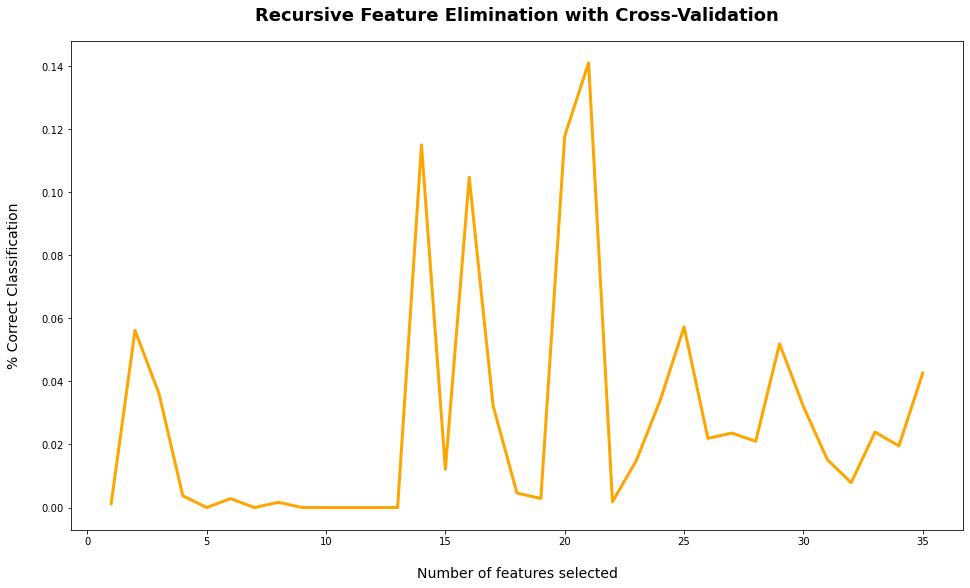

In [61]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.feature_importances_) + 1), final_model.feature_importances_, color='orange', linewidth=3)
plt.show()


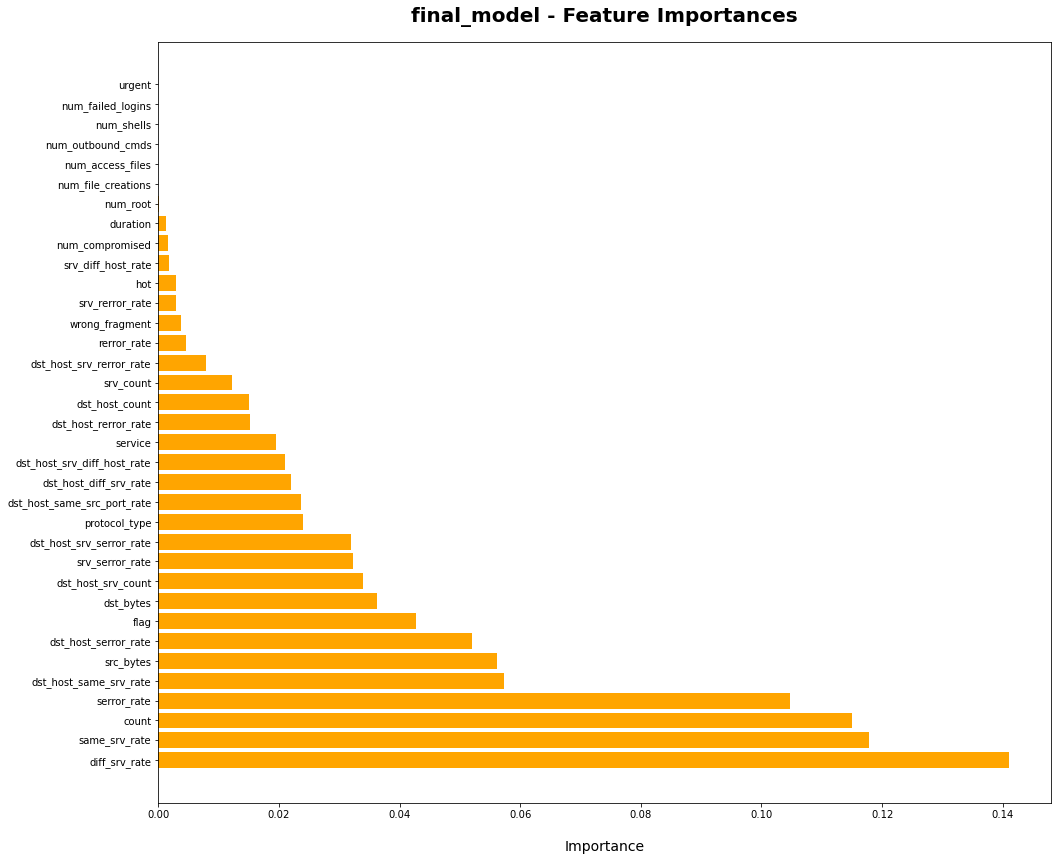

In [62]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.feature_importances_

df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [88]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])



Actual Class : 1
Predicted Class : 0


In [89]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

# XGBOOST 

### Find the best hyper parameter

In [90]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=xgb.XGBClassifier()

hyperparameter_of_the_model(model,parameters,X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[04:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best hyper parameter of the model is  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain

### Train the model with best parameters

In [91]:
#train with best hyperparameters
final_model=xgb.XGBClassifier(n_estimators=113,max_depth=14,min_samples_split=122,min_samples_leaf=28)  

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_under_sampling.joblib')

[05:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_under_sampling.joblib']

In [92]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [93]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9999825637150911
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.8896631823461091


In [94]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.9999709398629524
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9759477936606588


In [95]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9999941878374687
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.8173962833793139


In [96]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

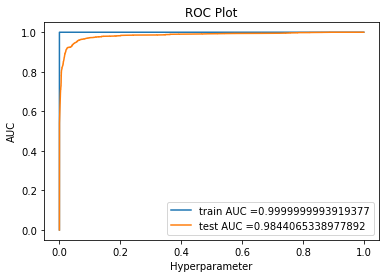

In [97]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


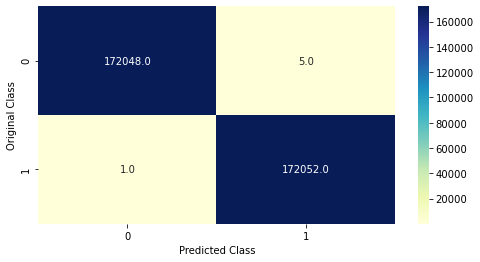

-------------------- Precision matrix (Columm Sum=1) --------------------


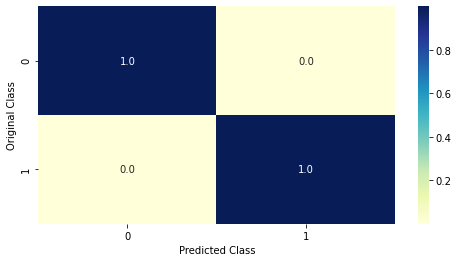

-------------------- Recall matrix (Row sum=1) --------------------


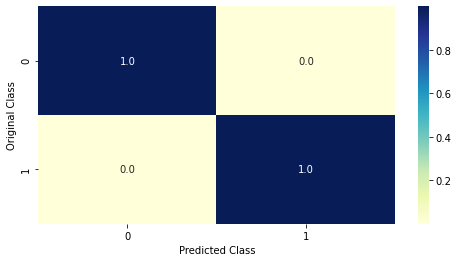

In [98]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


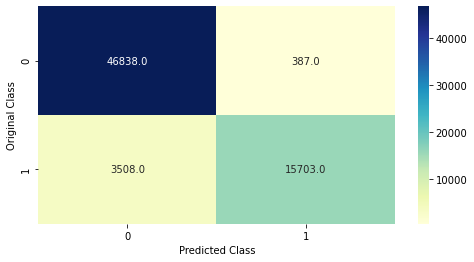

-------------------- Precision matrix (Columm Sum=1) --------------------


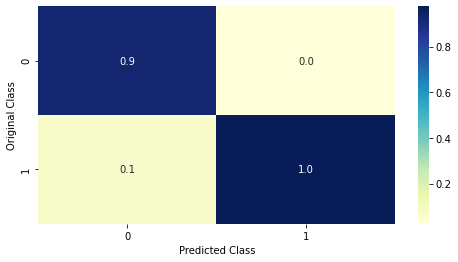

-------------------- Recall matrix (Row sum=1) --------------------


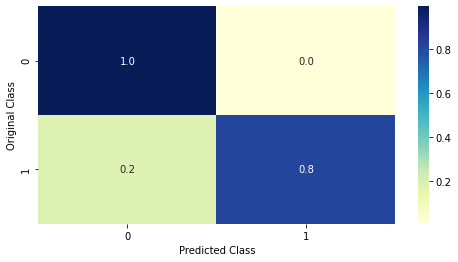

In [99]:

print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [63]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_under_sampling.joblib')

In [64]:
sorted_idx = np.argsort(final_model.feature_importances_)[::-1]

for index in sorted_idx:
    print([X_train.columns[index], final_model.feature_importances_[index]]) 


['same_srv_rate', 0.8853848]
['srv_serror_rate', 0.031000772]
['wrong_fragment', 0.027475117]
['protocol_type', 0.023479775]
['srv_count', 0.0067259637]
['src_bytes', 0.005465999]
['dst_host_srv_serror_rate', 0.00427055]
['hot', 0.002642813]
['num_failed_logins', 0.0024065431]
['duration', 0.0018277505]
['dst_host_serror_rate', 0.0013349804]
['num_file_creations', 0.0009719945]
['dst_host_diff_srv_rate', 0.0008475372]
['dst_host_rerror_rate', 0.00072034]
['service', 0.00065979635]
['dst_host_same_src_port_rate', 0.00057747844]
['dst_host_srv_diff_host_rate', 0.000512381]
['serror_rate', 0.0004846185]
['num_compromised', 0.00046976338]
['dst_host_srv_count', 0.00042249082]
['num_access_files', 0.00037580723]
['count', 0.0003549373]
['dst_bytes', 0.00026211177]
['dst_host_same_srv_rate', 0.00026161023]
['dst_host_count', 0.00024556642]
['rerror_rate', 0.00021818373]
['dst_host_srv_rerror_rate', 0.0001434782]
['diff_srv_rate', 0.00012760774]
['flag', 0.00012208293]
['num_root', 9.291903e-

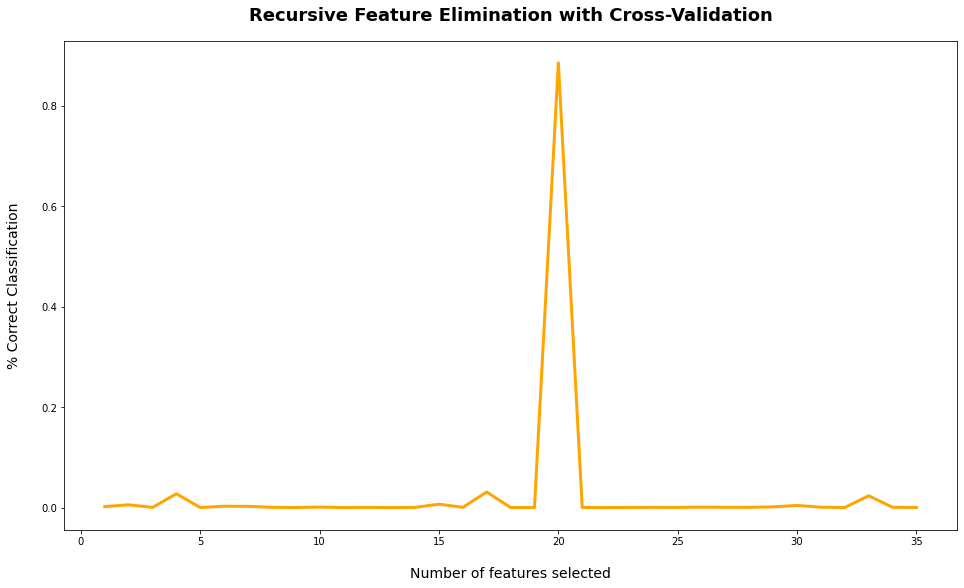

In [65]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.feature_importances_) + 1), final_model.feature_importances_, color='orange', linewidth=3)
plt.show()


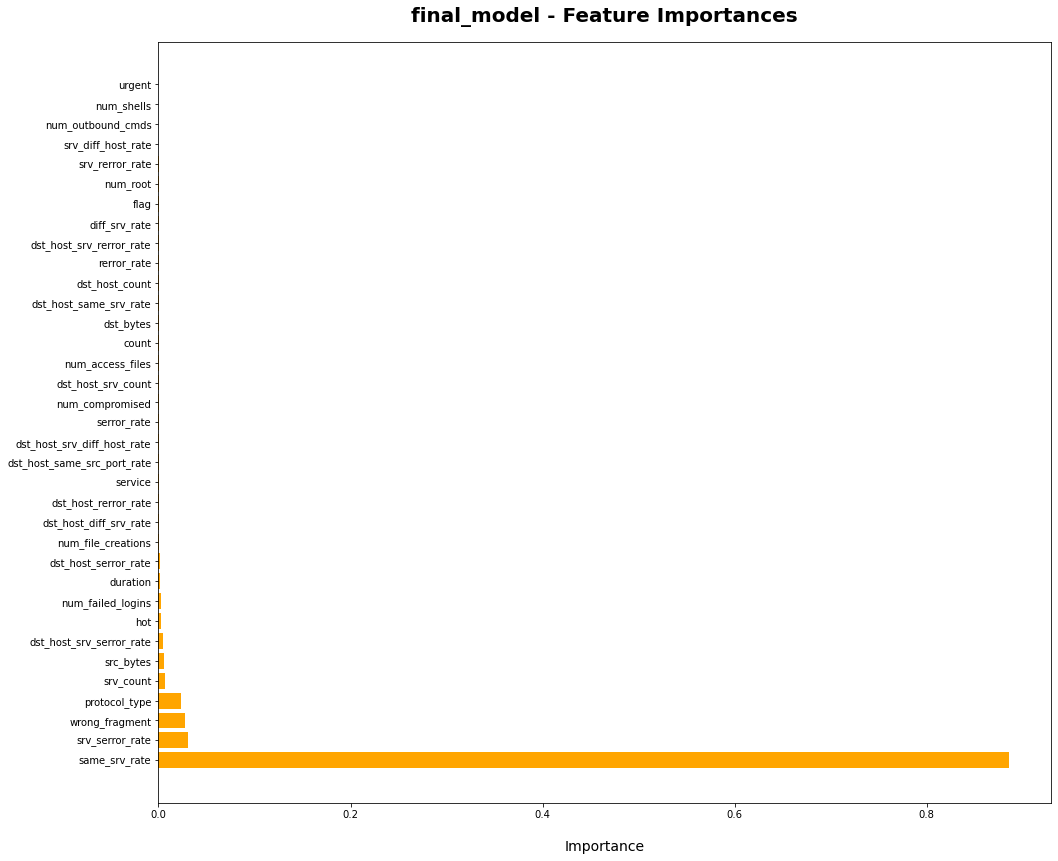

In [66]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.feature_importances_

df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [100]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 1
Predicted Class : 0


In [101]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

## Part 3 Over Sampling using RandomOverSampler

In [10]:
# protocol
X_train_protocol_type , X_test_protocol_type = label_encoding(df_train,df_test,'protocol_type')

#service
X_train_service , X_test_service = label_encoding(df_train,df_test,'service')

#flag
X_train_flag , X_test_flag = label_encoding(df_train,df_test,'flag')

In [11]:
continuous_features=["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]



In [12]:
y = df_train['class_label_bi'] 
x = df_train[continuous_features]

In [13]:
x.shape , y.shape

((950470, 32), (950470,))

In [14]:
x['protocol_type'] = X_train_protocol_type
x['service'] = X_train_service
x['flag'] = X_train_flag


In [15]:
x.shape , y.shape

((950470, 35), (950470,))

In [16]:
from collections import Counter

Counter(y)

Counter({0: 778417, 1: 172053})

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
os=RandomOverSampler()

X_train_ros,y_train_ros=os.fit_resample(x,y)


In [19]:
print("The number of classes before fit {}".format(Counter(y)))

print("The number of classes after fit {}".format(Counter(y_train_ros)))

The number of classes before fit Counter({0: 778417, 1: 172053})
The number of classes after fit Counter({0: 778417, 1: 778417})


In [20]:
X_train_ros.shape , y_train_ros.shape

((1556834, 35), (1556834,))

In [21]:
X_train_ros['class_label_bi'] = y_train_ros

In [22]:
X_train_ros.shape

(1556834, 36)

In [23]:
X_train_ros.to_csv("over_sample_train_ros.csv", index=False)


In [67]:
""" Reload the cleaned datasets """

df_train3=pd.read_csv("over_sample_train_ros.csv")

In [68]:
df_train3.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class_label_bi
0,0,215,45076,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,24,9,0
1,0,162,4528,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1,24,9,0
2,0,236,1228,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,1,24,9,0
3,0,239,486,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,1,24,9,0
4,0,238,1282,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,1,24,9,0


In [69]:
df_train3.shape

(1556834, 36)

In [70]:
y_train=df_train3['class_label_bi']

X_train=df_train3.drop(['class_label_bi'], axis = 1)

In [106]:
X_test = df_test[continuous_features]

In [107]:
X_test['protocol_type'] = X_test_protocol_type
X_test['service'] = X_test_service
X_test['flag'] = X_test_flag


In [108]:
y_test=df_test['class_label_bi']

In [109]:
X_test.shape , y_test.shape

((66436, 35), (66436,))

### Modeling

In [110]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    
    # C = 2,2  matrix, each cell (i,j) represents number of points of class i are predicted class j
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    B =(C/C.sum(axis=0))
    
    
    labels = [0,1]
    cmap=sns.light_palette("green")
    
    #Confusion matrix
    
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Precision matrix

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    #Recall matrix
    
    
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [111]:
def hyperparameter_of_the_model(model,parameters,X_train,y_train):
    
    #use gridsearch to test all values
    clf = RandomizedSearchCV(model, 
                             parameters, 
                             n_iter=5,
                             cv=10 , 
                             refit = True, 
                             verbose = 3, 
                             scoring='roc_auc',
                             return_train_score=True,
                             n_jobs=-1)
    
    
    #fit model to data
    clf.fit(X_train, y_train)
    
    #find the best tuned parameters
    best_parameter=clf.best_estimator_
    print("Best hyper parameter of the model is " , best_parameter)
   

# Logistic regression

### Find the best hyper parameter

In [112]:
#Parameter input values
parameters = {
    'C': [0.00001,0.0001, 0.001,0.01,0.1,1,5,10,50,100],
    'max_iter': list(range(100,800,100))
}

#model input
model = LogisticRegression()

hyperparameter_of_the_model(model,parameters,X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  LogisticRegression(C=10, max_iter=200)


### Train the model with best parameters

In [113]:
#train with best hyperparameters
final_model=LogisticRegression(C=10, max_iter=200)

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_over_sampling_RandomOverSampler.joblib')

['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_over_sampling_RandomOverSampler.joblib']

In [114]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [115]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9552989298661707
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.7951771884534147


In [116]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.954109641703829
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9110035625462123


In [117]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9564911866004981
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.7054812347092811


In [118]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

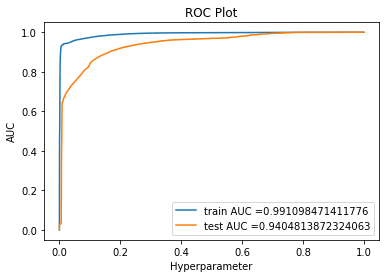

In [119]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


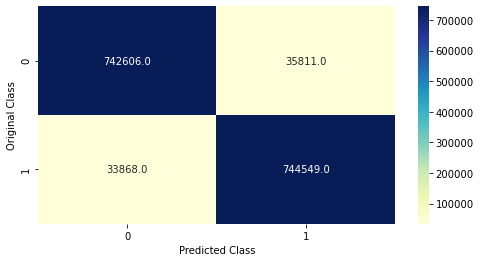

-------------------- Precision matrix (Columm Sum=1) --------------------


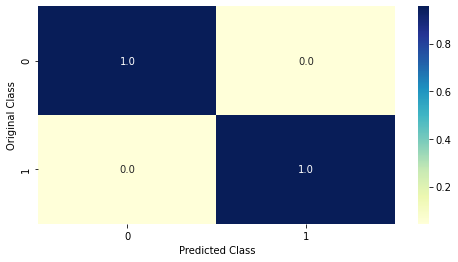

-------------------- Recall matrix (Row sum=1) --------------------


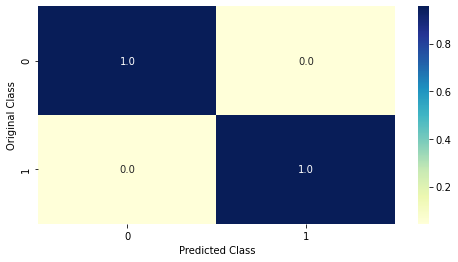

In [120]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


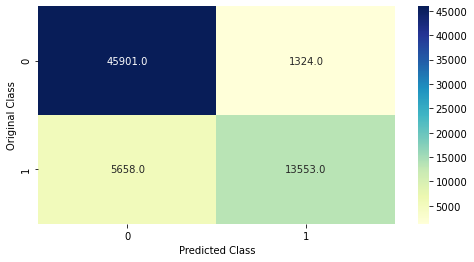

-------------------- Precision matrix (Columm Sum=1) --------------------


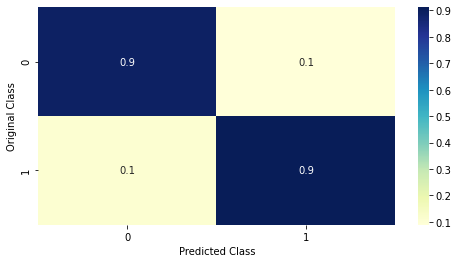

-------------------- Recall matrix (Row sum=1) --------------------


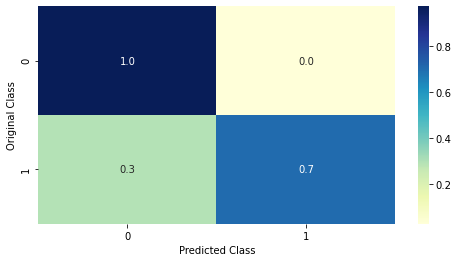

In [121]:
print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [100]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_over_sampling_RandomOverSampler.joblib')

In [101]:
sorted_idx = np.argsort(final_model.coef_[0])[::-1] 

for index in sorted_idx:
    print([X_train.columns[index], final_model.coef_[0][index]]) 


['count', 0.03589599726909998]
['srv_count', 0.003915021332790979]
['dst_host_count', 0.0013037909866649806]
['srv_serror_rate', 0.00025452357176231755]
['serror_rate', 0.00025424430088502543]
['dst_host_serror_rate', 0.00025119761051298125]
['dst_host_srv_serror_rate', 0.0002506677119525022]
['srv_rerror_rate', 5.9197314525205505e-05]
['rerror_rate', 5.845176671195285e-05]
['dst_host_srv_rerror_rate', 5.5583338294346345e-05]
['dst_host_rerror_rate', 5.253018598108804e-05]
['hot', 5.138343916506657e-05]
['wrong_fragment', 3.25945182944379e-05]
['dst_host_srv_diff_host_rate', 3.223099205661527e-05]
['srv_diff_host_rate', 8.663341778246854e-06]
['dst_host_same_src_port_rate', 1.1200454368728964e-06]
['num_failed_logins', 9.159861379695375e-07]
['src_bytes', 3.6745714166294356e-07]
['dst_bytes', 9.944001019446326e-09]
['num_outbound_cmds', 0.0]
['urgent', -7.03923263297487e-08]
['num_shells', -6.952647707603994e-07]
['num_access_files', -3.2525604623732687e-06]
['diff_srv_rate', -4.941147

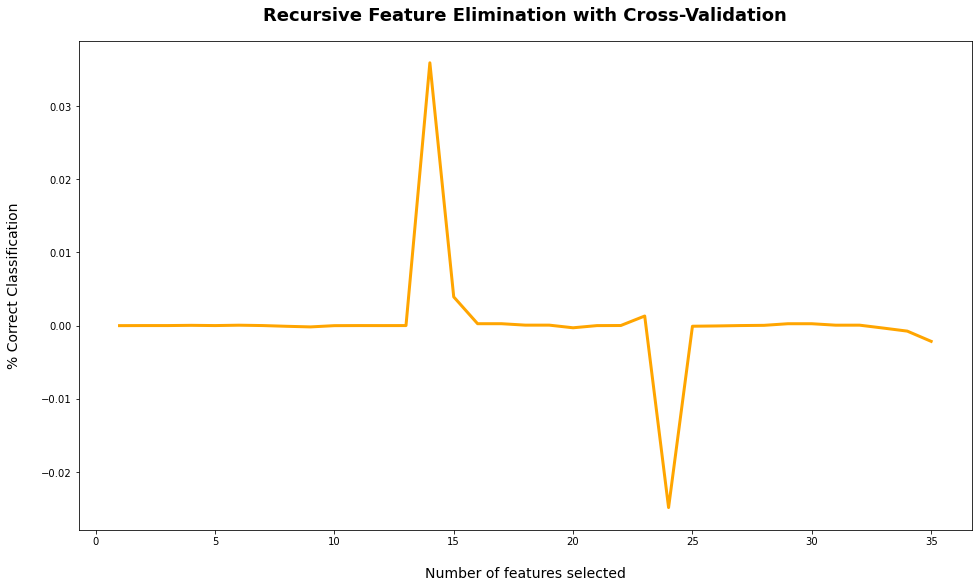

In [102]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.coef_[0]) + 1), final_model.coef_[0], color='orange', linewidth=3)
plt.show()


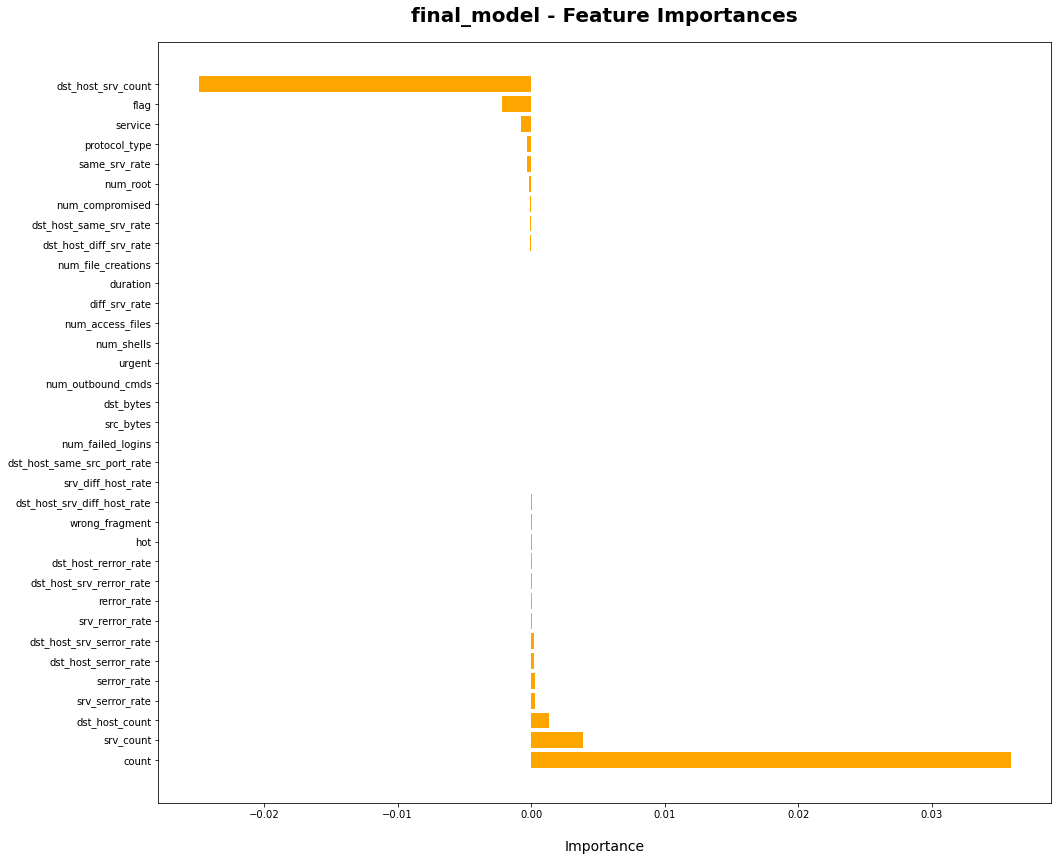

In [103]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.coef_[0]
df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [122]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 1
Predicted Class : 0


In [123]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

# Random Forest 

### Find the best hyper parameter

In [124]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=RandomForestClassifier()

hyperparameter_of_the_model(model,parameters,X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  RandomForestClassifier(max_depth=13, min_samples_leaf=39, min_samples_split=132,
                       n_estimators=113)


### Train the model with best parameters

In [125]:
#train with best hyperparameters
final_model=RandomForestClassifier(max_depth=13, min_samples_leaf=39, min_samples_split=132,n_estimators=113)

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_over_sampling_RandomOverSampler.joblib')

['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_over_sampling_RandomOverSampler.joblib']

In [126]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [127]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9992538824141821
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.8811108560936424


In [128]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.999754384430802
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.981527644614893


In [129]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9987538812744327
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.7993337150590807


In [130]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

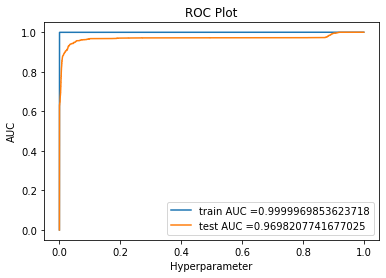

In [131]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


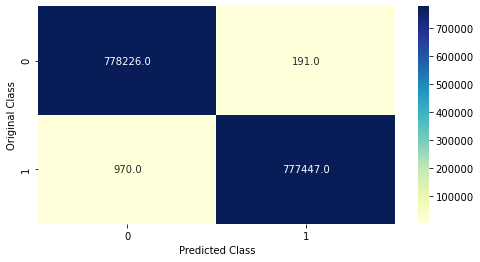

-------------------- Precision matrix (Columm Sum=1) --------------------


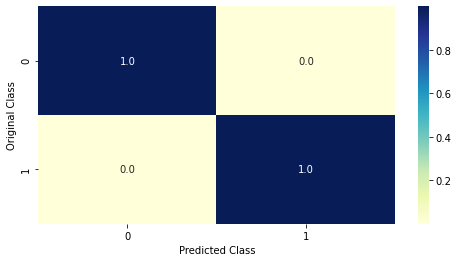

-------------------- Recall matrix (Row sum=1) --------------------


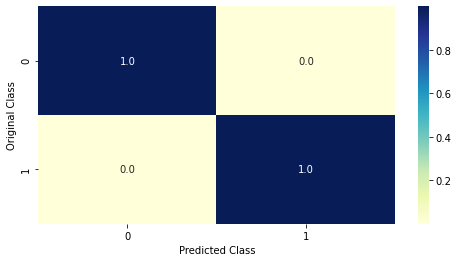

In [132]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


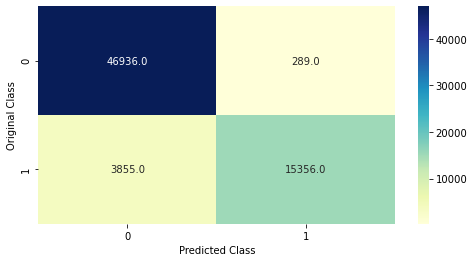

-------------------- Precision matrix (Columm Sum=1) --------------------


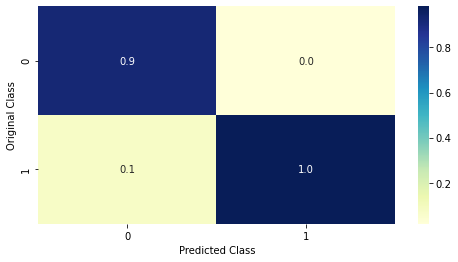

-------------------- Recall matrix (Row sum=1) --------------------


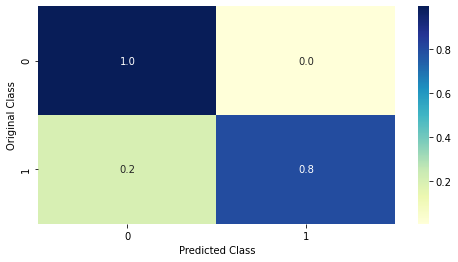

In [133]:

print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [75]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_over_sampling_RandomOverSampler.joblib')

In [76]:
sorted_idx = np.argsort(final_model.feature_importances_)[::-1]

for index in sorted_idx:
    print([X_train.columns[index], final_model.feature_importances_[index]]) 


['src_bytes', 0.1677961285853993]
['same_srv_rate', 0.13247521640383536]
['diff_srv_rate', 0.13211437501762818]
['flag', 0.10101908873166442]
['dst_bytes', 0.07266165406825245]
['count', 0.059783496430391755]
['dst_host_same_srv_rate', 0.055651383443151584]
['dst_host_srv_count', 0.04946810050327624]
['dst_host_diff_srv_rate', 0.03115740443101934]
['dst_host_count', 0.024181360632579342]
['dst_host_serror_rate', 0.02268391946287949]
['dst_host_srv_serror_rate', 0.020447854983818195]
['dst_host_srv_diff_host_rate', 0.020303895937880925]
['protocol_type', 0.018424223338895988]
['srv_serror_rate', 0.01837826797791371]
['service', 0.016516748378764632]
['serror_rate', 0.014372455334618825]
['dst_host_same_src_port_rate', 0.013051331744533783]
['srv_count', 0.006715678715941873]
['rerror_rate', 0.005685607213153545]
['dst_host_rerror_rate', 0.004117929521793088]
['hot', 0.003241539580581358]
['num_compromised', 0.002637609255439584]
['wrong_fragment', 0.0024564817987243223]
['dst_host_srv_r

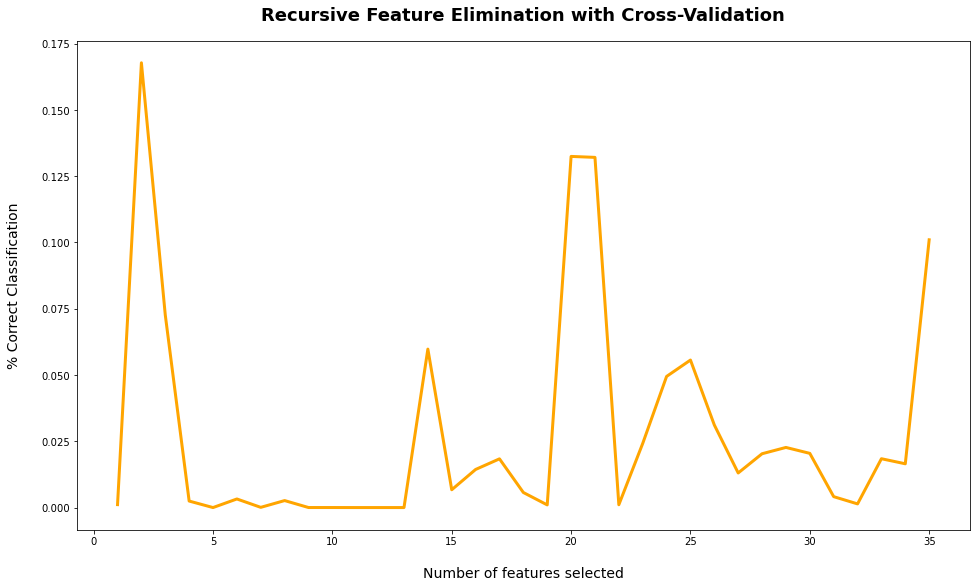

In [77]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.feature_importances_) + 1), final_model.feature_importances_, color='orange', linewidth=3)
plt.show()


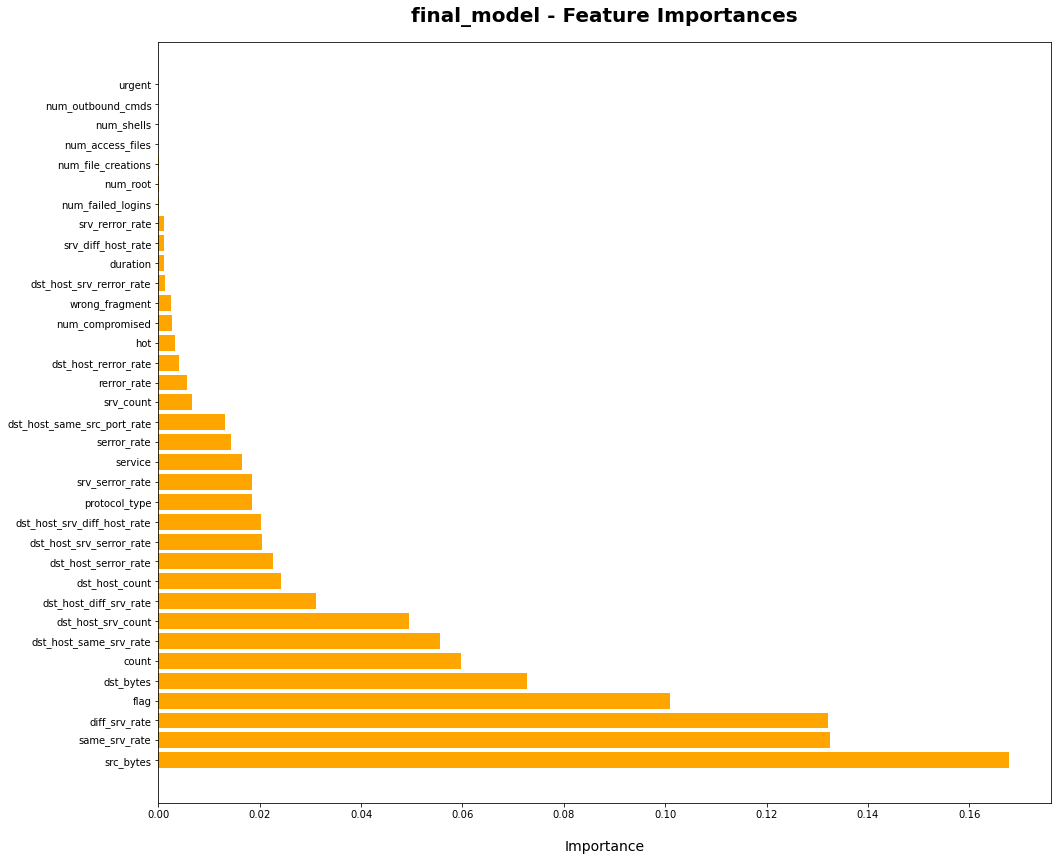

In [78]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.feature_importances_

df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [134]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])



Actual Class : 1
Predicted Class : 0


In [135]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

# XGBOOST 

### Find the best hyper parameter

In [136]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=xgb.XGBClassifier()

hyperparameter_of_the_model(model,parameters,X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[08:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best hyper parameter of the model is  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain

### Train the model with best parameters

In [137]:
#train with best hyperparameters
final_model=xgb.XGBClassifier(n_estimators=111,max_depth=14,min_samples_split=121,min_samples_leaf=42)  

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_over_sampling_RandomOverSampler.joblib')

[08:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_over_sampling_RandomOverSampler.joblib']

In [138]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [139]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9999961460394131
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.8924972322366366


In [140]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.9999922921085322
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9815184815184815


In [141]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 1.0
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.8182811930664723


In [142]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

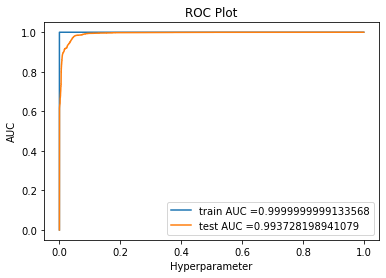

In [143]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


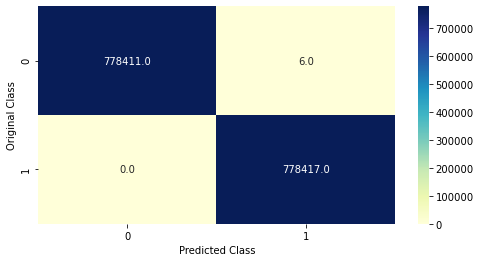

-------------------- Precision matrix (Columm Sum=1) --------------------


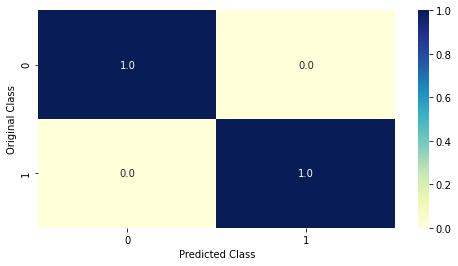

-------------------- Recall matrix (Row sum=1) --------------------


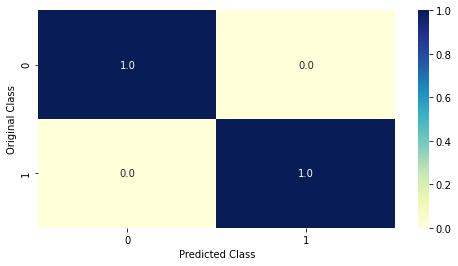

In [144]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 Test confusion matrix 
-------------------- Confusion matrix --------------------


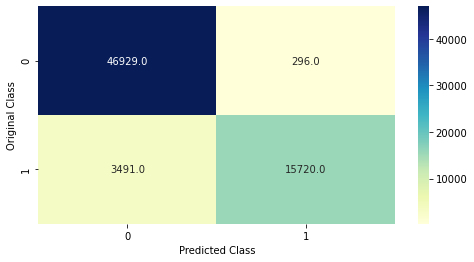

-------------------- Precision matrix (Columm Sum=1) --------------------


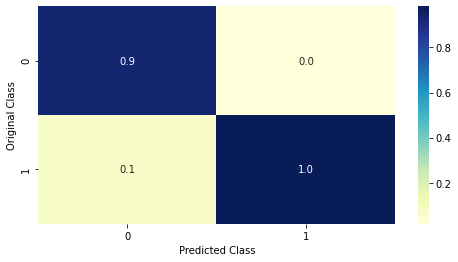

-------------------- Recall matrix (Row sum=1) --------------------


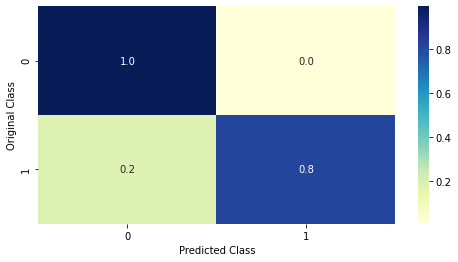

In [145]:

print("*-"*25)

print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


<h6> Important Features of XGBClassifier_over_sampling_RandomOverSampler model </h6>

<h6>   As we got train recall score for this model is 1 </h6>

In [79]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_over_sampling_RandomOverSampler.joblib')

In [80]:
sorted_idx = np.argsort(final_model.feature_importances_)[::-1]

for index in sorted_idx:
    print([X_train.columns[index], final_model.feature_importances_[index]]) 


['src_bytes', 0.40986633]
['wrong_fragment', 0.21202159]
['protocol_type', 0.14385079]
['dst_host_same_srv_rate', 0.08916573]
['dst_host_rerror_rate', 0.049948413]
['hot', 0.042115122]
['dst_bytes', 0.009723357]
['same_srv_rate', 0.006610593]
['dst_host_same_src_port_rate', 0.0060849716]
['flag', 0.0046236063]
['dst_host_srv_rerror_rate', 0.0035613705]
['dst_host_srv_diff_host_rate', 0.0033099568]
['duration', 0.0021762361]
['service', 0.0021076822]
['dst_host_srv_serror_rate', 0.0019951242]
['diff_srv_rate', 0.0019827762]
['num_shells', 0.0012647315]
['count', 0.0011391332]
['urgent', 0.0011166236]
['num_file_creations', 0.0010178719]
['rerror_rate', 0.000874617]
['dst_host_diff_srv_rate', 0.0006650767]
['srv_diff_host_rate', 0.0006383491]
['num_compromised', 0.0006183041]
['num_failed_logins', 0.0005831912]
['serror_rate', 0.0005530027]
['dst_host_serror_rate', 0.0005192657]
['srv_count', 0.0004774849]
['dst_host_count', 0.00041432487]
['dst_host_srv_count', 0.000396434]
['srv_serror

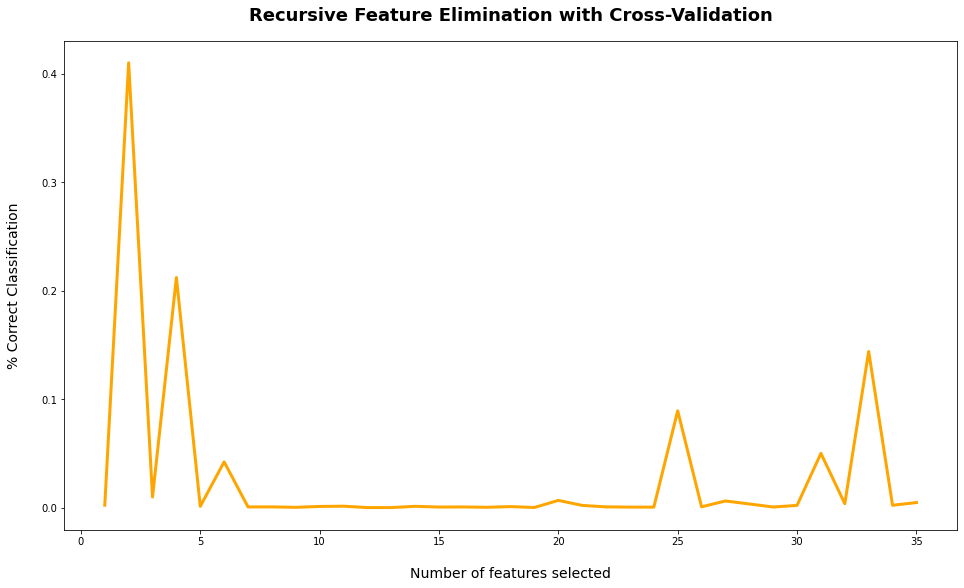

In [81]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.feature_importances_) + 1), final_model.feature_importances_, color='orange', linewidth=3)
plt.show()


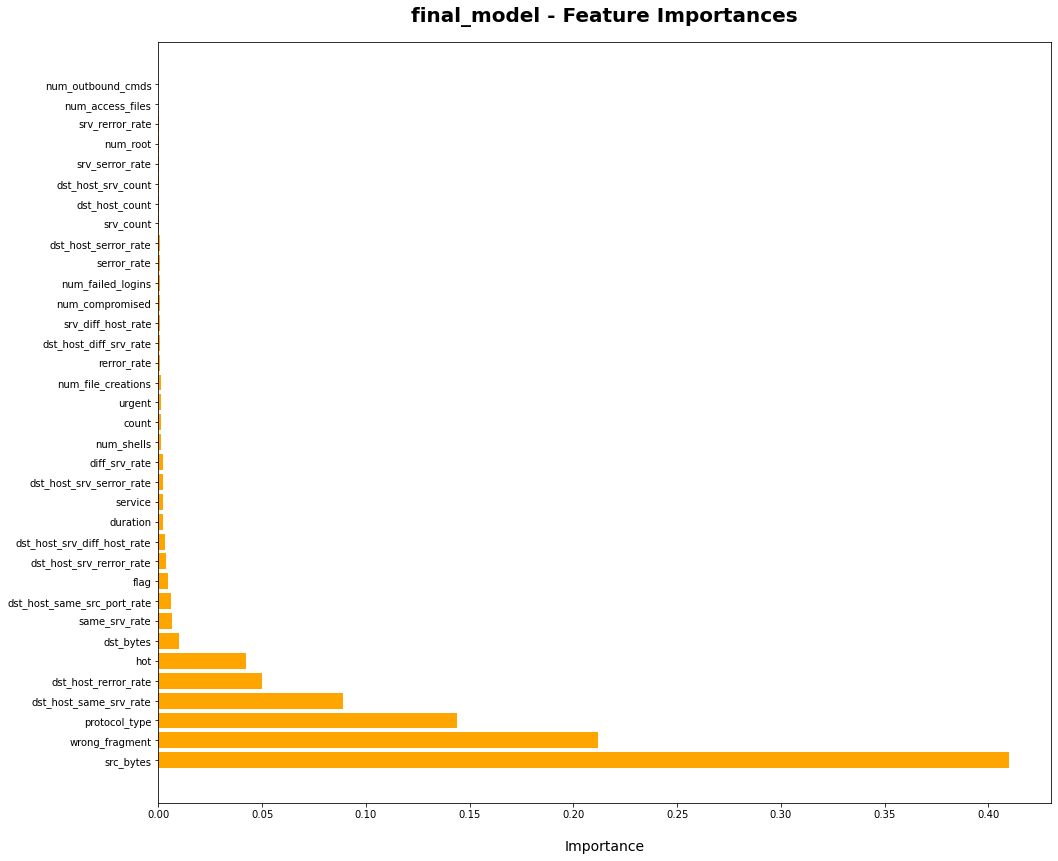

In [82]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.feature_importances_

df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [146]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 1
Predicted Class : 0


In [147]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

## Part 4 Over Sampling using SMOTETomek

In [11]:
# protocol
X_train_protocol_type , X_test_protocol_type = label_encoding(df_train,df_test,'protocol_type')

#service
X_train_service , X_test_service = label_encoding(df_train,df_test,'service')

#flag
X_train_flag , X_test_flag = label_encoding(df_train,df_test,'flag')

In [12]:
continuous_features=["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]



In [13]:
y = df_train['class_label_bi'] 
x = df_train[continuous_features]

In [14]:
x.shape , y.shape

((950470, 32), (950470,))

In [15]:
x['protocol_type'] = X_train_protocol_type
x['service'] = X_train_service
x['flag'] = X_train_flag


In [16]:
x.shape , y.shape

((950470, 35), (950470,))

In [17]:
from collections import Counter

Counter(y)

Counter({0: 778417, 1: 172053})

In [18]:
from imblearn.combine import SMOTETomek

In [71]:
smk = SMOTETomek(random_state=42)

X_smk,y_smk=smk.fit_resample(x,y)


In [73]:
print("The number of classes before fit {}".format(Counter(y)))

print("The number of classes after fit {}".format(Counter(y_smk)))

The number of classes before fit Counter({0: 778417, 1: 172053})
The number of classes after fit Counter({0: 778373, 1: 778373})


In [74]:
X_smk.shape , y_smk.shape

((1556746, 35), (1556746,))

In [75]:
X_smk['class_label_bi'] = y_smk

In [76]:
X_smk.shape

(1556746, 36)

In [77]:
X_smk.to_csv("over_sample_train_smk.csv", index=False)


In [83]:
""" Reload the cleaned datasets """

df_train4=pd.read_csv("over_sample_train_smk.csv")

In [84]:
df_train4.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class_label_bi
0,0,215,45076,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,24,9,0
1,0,162,4528,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1,24,9,0
2,0,236,1228,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,1,24,9,0
3,0,239,486,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,1,24,9,0
4,0,238,1282,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,1,24,9,0


In [85]:
df_train4.shape

(1556746, 36)

In [86]:
y_train=df_train4['class_label_bi']

X_train=df_train4.drop(['class_label_bi'], axis = 1)

In [87]:
X_test = df_test[continuous_features]

In [24]:
X_test['protocol_type'] = X_test_protocol_type
X_test['service'] = X_test_service
X_test['flag'] = X_test_flag


In [25]:
y_test=df_test['class_label_bi']

In [26]:
X_test.shape , y_test.shape

((66436, 35), (66436,))

### Modeling

In [27]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    
    # C = 2,2  matrix, each cell (i,j) represents number of points of class i are predicted class j
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    B =(C/C.sum(axis=0))
    
    
    labels = [0,1]
    cmap=sns.light_palette("green")
    
    #Confusion matrix
    
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Precision matrix

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    #Recall matrix
    
    
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [28]:
def hyperparameter_of_the_model(model,parameters,X_train,y_train):
    
    #use gridsearch to test all values
    clf = RandomizedSearchCV(model, 
                             parameters, 
                             n_iter=5,
                             cv=10 , 
                             refit = True, 
                             verbose = 3, 
                             scoring='roc_auc',
                             return_train_score=True,
                             n_jobs=-1)
    
    
    #fit model to data
    clf.fit(X_train, y_train)
    
    #find the best tuned parameters
    best_parameter=clf.best_estimator_
    print("Best hyper parameter of the model is " , best_parameter)
   

# Logistic regression

### Find the best hyper parameter

In [29]:
#Parameter input values
parameters = {
    'C': [0.00001,0.0001, 0.001,0.01,0.1,1,5,10,50,100],
    'max_iter': list(range(100,800,100))
}

#model input
model = LogisticRegression()

hyperparameter_of_the_model(model,parameters,X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  LogisticRegression(C=50, max_iter=200)


### Train the model with best parameters

In [30]:
#train with best hyperparameters
final_model=LogisticRegression(C=50, max_iter=200)

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_over_sampling_SMOTETomek.joblib')

['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_over_sampling_SMOTETomek.joblib']

In [31]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [32]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.965847019684677
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.7902498476538695


In [33]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.989105947021776
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9528988169593652


In [34]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9436568329065885
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.6750299307688303


In [35]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

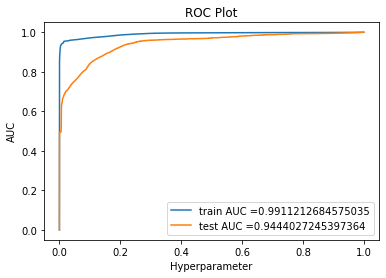

In [36]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


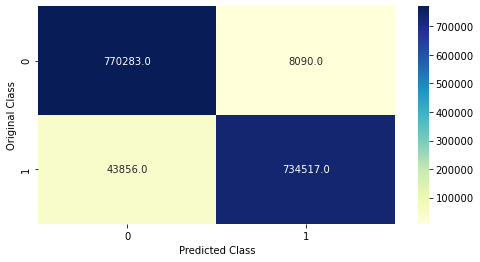

-------------------- Precision matrix (Columm Sum=1) --------------------


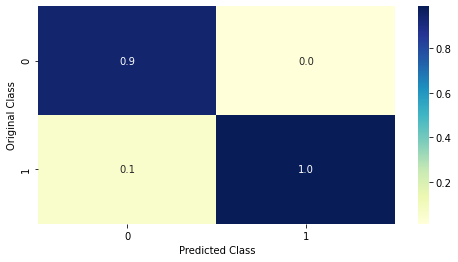

-------------------- Recall matrix (Row sum=1) --------------------


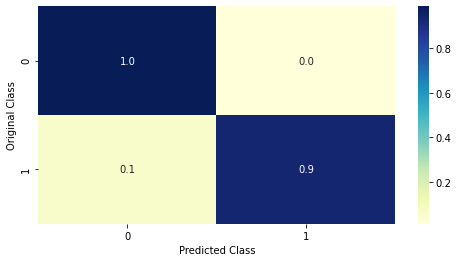

In [37]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


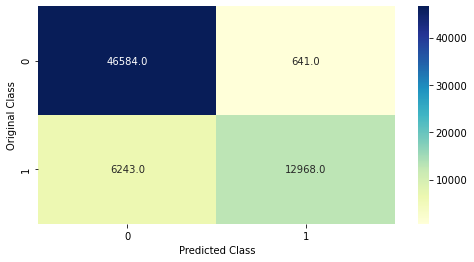

-------------------- Precision matrix (Columm Sum=1) --------------------


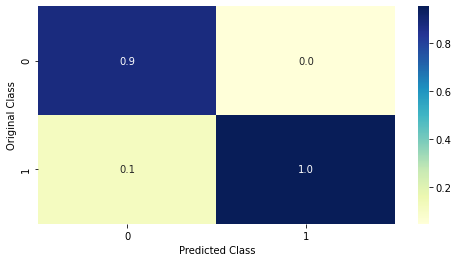

-------------------- Recall matrix (Row sum=1) --------------------


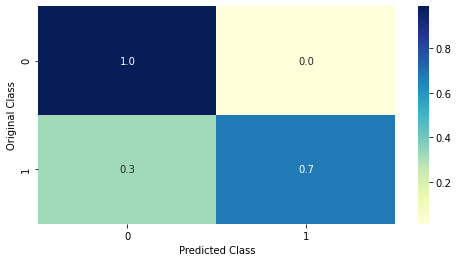

In [38]:

print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [88]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\LogisticRegression_over_sampling_SMOTETomek.joblib')

In [89]:
sorted_idx = np.argsort(final_model.coef_[0])[::-1] 

for index in sorted_idx:
    print([X_train.columns[index], final_model.coef_[0][index]]) 


['count', 0.06163803677386174]
['srv_serror_rate', 0.002096208273388491]
['serror_rate', 0.002091395027708092]
['dst_host_serror_rate', 0.002074692026371417]
['dst_host_srv_serror_rate', 0.0020477208684231956]
['hot', 0.0018316114477925332]
['srv_rerror_rate', 0.0006037281767603227]
['rerror_rate', 0.0005888886507563374]
['dst_host_srv_rerror_rate', 0.0005601554393136852]
['srv_diff_host_rate', 0.0005365020380988989]
['dst_host_srv_diff_host_rate', 0.0005131871604038427]
['dst_host_rerror_rate', 0.0005120274427975488]
['dst_host_same_src_port_rate', 0.0004813251785865238]
['wrong_fragment', 0.0004111114401885211]
['dst_host_same_srv_rate', 8.192729762455945e-05]
['diff_srv_rate', 4.960982347588618e-05]
['dst_host_count', 2.2360389897410716e-05]
['num_failed_logins', 1.2106750943700996e-05]
['duration', 7.65834856509929e-06]
['src_bytes', 3.760866758788955e-07]
['dst_bytes', 1.2296325466390144e-08]
['num_outbound_cmds', 0.0]
['urgent', -1.2426056591379828e-06]
['num_shells', -8.28131289

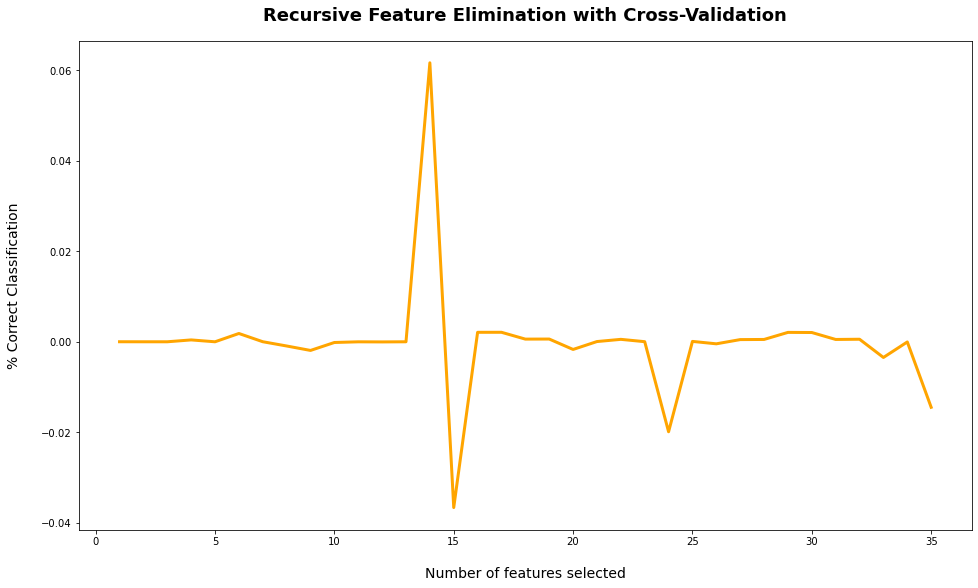

In [90]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.coef_[0]) + 1), final_model.coef_[0], color='orange', linewidth=3)
plt.show()


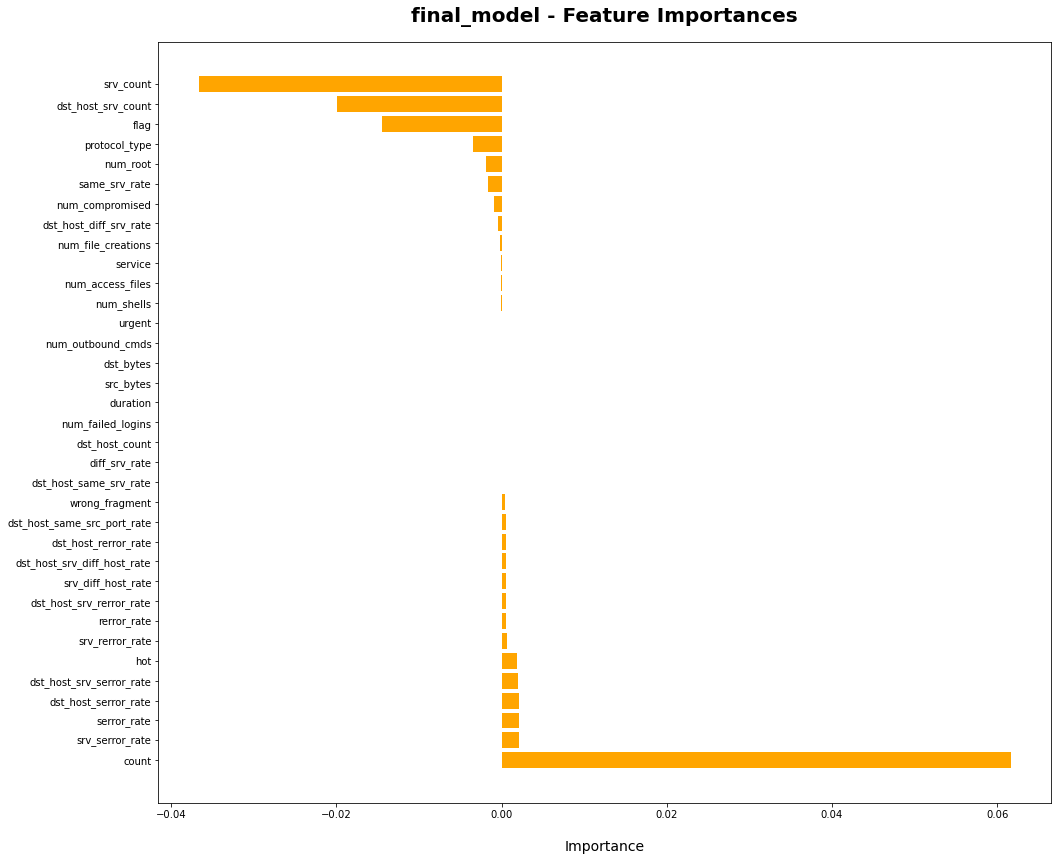

In [91]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.coef_[0]
df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [39]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 1
Predicted Class : 0


In [40]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

# Random Forest 

### Find the best hyper parameter

In [41]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=RandomForestClassifier()

hyperparameter_of_the_model(model,parameters,X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  RandomForestClassifier(max_depth=14, min_samples_leaf=25, min_samples_split=116,
                       n_estimators=121)


### Train the model with best parameters

In [42]:
#train with best hyperparameters
final_model=RandomForestClassifier(max_depth=14, min_samples_leaf=25, min_samples_split=116,n_estimators=121)

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_over_sampling_SMOTETomek.joblib')

['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_over_sampling_SMOTETomek.joblib']

In [43]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [44]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9994685844748271
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.8767636049524906


In [45]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.9998058746696012
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9810554803788903


In [46]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 0.9991315217768345
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.7925147051168602


In [47]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

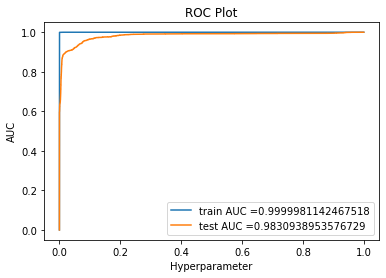

In [48]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


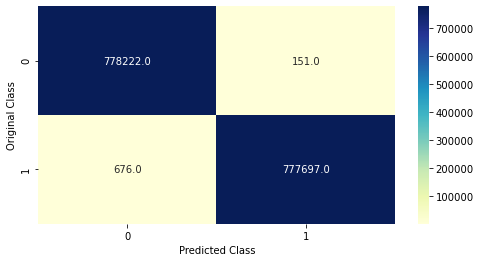

-------------------- Precision matrix (Columm Sum=1) --------------------


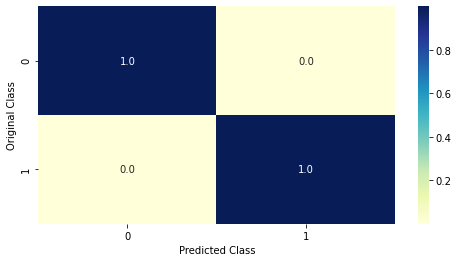

-------------------- Recall matrix (Row sum=1) --------------------


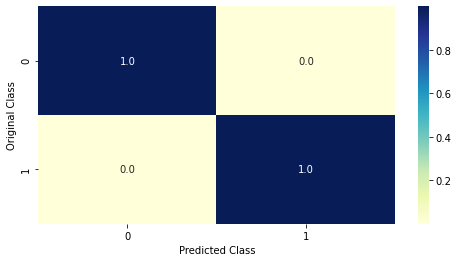

In [49]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


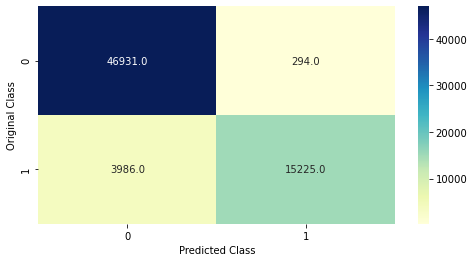

-------------------- Precision matrix (Columm Sum=1) --------------------


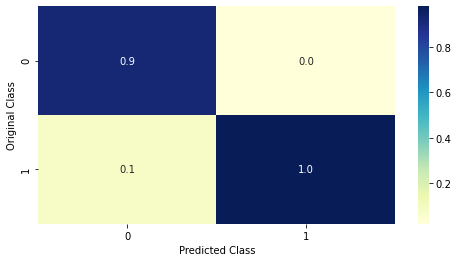

-------------------- Recall matrix (Row sum=1) --------------------


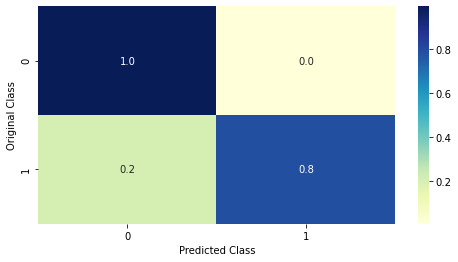

In [50]:

print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


In [92]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\RandomForestClassifier_over_sampling_SMOTETomek.joblib')

In [93]:
sorted_idx = np.argsort(final_model.feature_importances_)[::-1]

for index in sorted_idx:
    print([X_train.columns[index], final_model.feature_importances_[index]]) 


['src_bytes', 0.1983365282430207]
['same_srv_rate', 0.12050499570280546]
['diff_srv_rate', 0.12016728198416925]
['flag', 0.08190197138876819]
['dst_bytes', 0.061645251702742584]
['dst_host_srv_count', 0.05922339978835025]
['dst_host_same_srv_rate', 0.05529438050599669]
['count', 0.049422366586829206]
['dst_host_serror_rate', 0.049345681387208025]
['dst_host_diff_srv_rate', 0.030464541857507008]
['srv_serror_rate', 0.023897102197299073]
['service', 0.023642348917084593]
['dst_host_count', 0.021646397932380237]
['protocol_type', 0.020842826655502175]
['dst_host_srv_serror_rate', 0.018044830156272857]
['dst_host_srv_diff_host_rate', 0.014085876042102005]
['serror_rate', 0.01229292762301065]
['dst_host_same_src_port_rate', 0.007855051570141358]
['srv_count', 0.005992187800221533]
['srv_rerror_rate', 0.0041938458932047696]
['dst_host_srv_rerror_rate', 0.0038569227867175345]
['dst_host_rerror_rate', 0.0034183101338013046]
['hot', 0.0032940813433470907]
['wrong_fragment', 0.003050175702567861

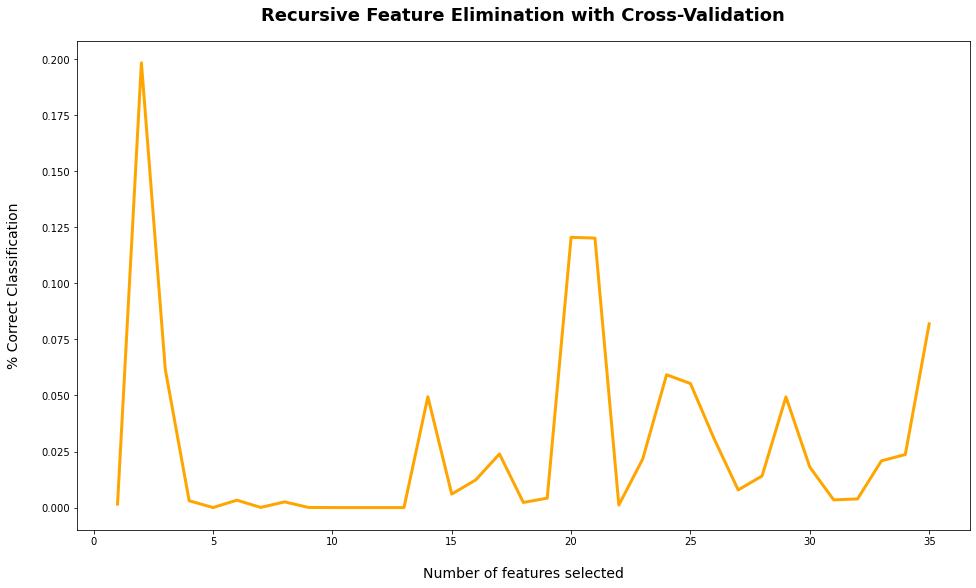

In [94]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.feature_importances_) + 1), final_model.feature_importances_, color='orange', linewidth=3)
plt.show()


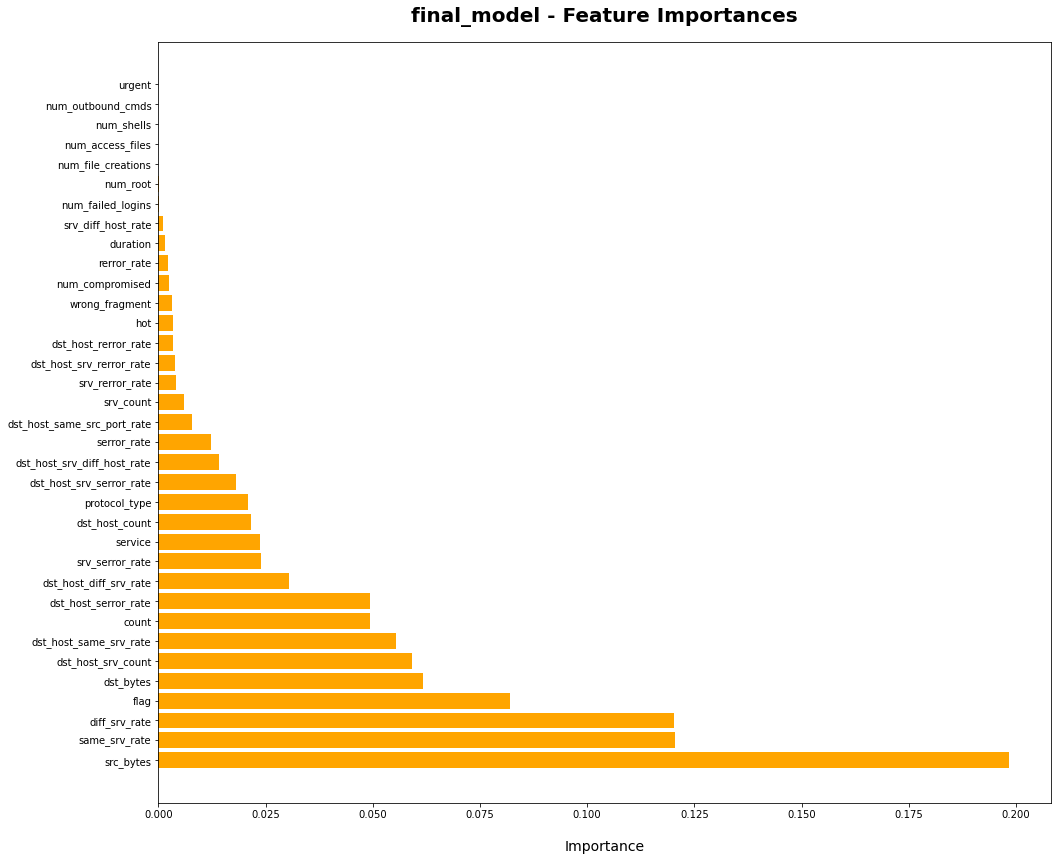

In [95]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.feature_importances_

df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [51]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])



Actual Class : 1
Predicted Class : 0


In [52]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

# XGBOOST 

### Find the best hyper parameter

In [53]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=xgb.XGBClassifier()

hyperparameter_of_the_model(model,parameters,X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[01:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best hyper parameter of the model is  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain

# Train the model with best parameters

In [54]:
#train with best hyperparameters
final_model=xgb.XGBClassifier(n_estimators=121,max_depth=10,min_samples_split=118,min_samples_leaf=53)  

#model train
final_model.fit(X_train , y_train)

#save model
joblib.dump(final_model, 'C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_over_sampling_SMOTETomek.joblib')

[02:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_over_sampling_SMOTETomek.joblib']

In [55]:
#predict the model output

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)
    

In [56]:
print('Train f1 score',f1_score(y_train,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9999961458215567
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.9015748031496063


In [57]:
print('Train precision score',precision_score(y_train,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_test,y_test_pred))



Train precision score 0.9999922916728227
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.980488103247905


In [58]:
print('Train recall score',recall_score(y_train,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_test,y_test_pred))


Train recall score 1.0
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.8344177814793607


In [59]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:,1])
    
test_fpr, test_tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

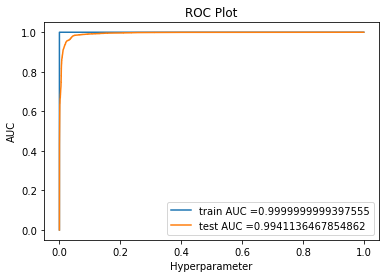

In [60]:
#AUC ROC plot

plot_roc_curve(train_fpr,train_tpr,test_fpr,test_tpr)

 Train confusion matrix 
-------------------- Confusion matrix --------------------


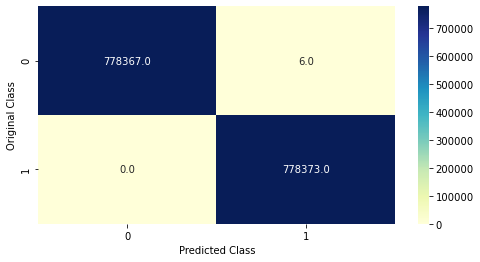

-------------------- Precision matrix (Columm Sum=1) --------------------


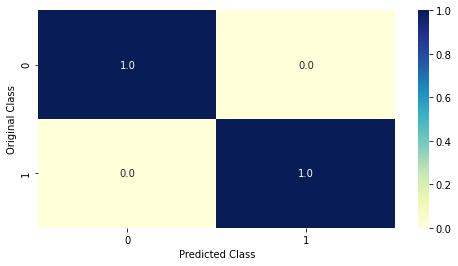

-------------------- Recall matrix (Row sum=1) --------------------


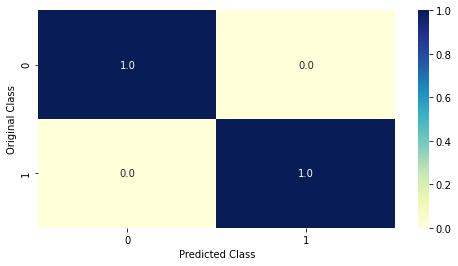

In [61]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_train, y_train_pred)


 Test confusion matrix 
-------------------- Confusion matrix --------------------


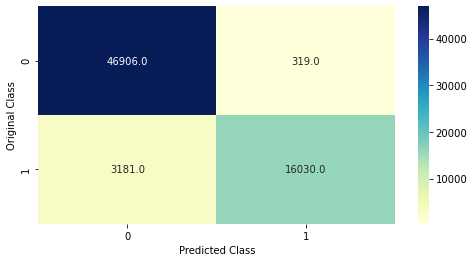

-------------------- Precision matrix (Columm Sum=1) --------------------


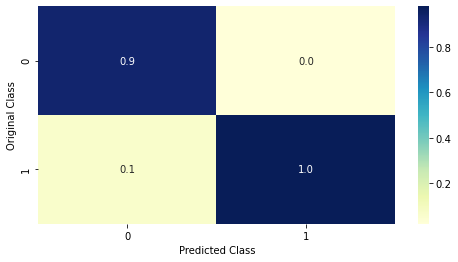

-------------------- Recall matrix (Row sum=1) --------------------


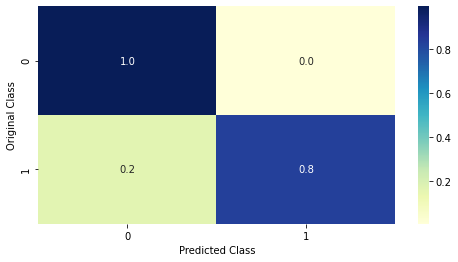

In [62]:


print(" Test confusion matrix ")
plot_confusion_matrix(y_test, y_test_pred)


<h6> Important Features of XGBClassifier_over_sampling_SMOTETomek model </h6>

<h6> As we get train recall score 1 </h6>

In [96]:
final_model = joblib.load('C:\\Users\\91912\\OneDrive\\Desktop\\cs1\\Trained_model\\XGBClassifier_over_sampling_SMOTETomek.joblib')

In [97]:
sorted_idx = np.argsort(final_model.feature_importances_)[::-1]

for index in sorted_idx:
    print([X_train.columns[index], final_model.feature_importances_[index]]) 


['wrong_fragment', 0.36707047]
['src_bytes', 0.33331397]
['protocol_type', 0.07198555]
['num_failed_logins', 0.056342304]
['dst_host_same_srv_rate', 0.05251996]
['flag', 0.02918781]
['hot', 0.024506267]
['dst_host_rerror_rate', 0.022703914]
['count', 0.008800746]
['dst_bytes', 0.0070127686]
['same_srv_rate', 0.006701333]
['dst_host_same_src_port_rate', 0.005132029]
['dst_host_srv_diff_host_rate', 0.0020762475]
['service', 0.0016733604]
['dst_host_srv_serror_rate', 0.0012544143]
['dst_host_serror_rate', 0.0011631054]
['diff_srv_rate', 0.0010038705]
['num_shells', 0.00085597776]
['serror_rate', 0.00083749474]
['dst_host_diff_srv_rate', 0.0008185791]
['num_file_creations', 0.0008062583]
['rerror_rate', 0.00063361105]
['dst_host_srv_count', 0.000589058]
['num_compromised', 0.0005292192]
['duration', 0.0005011371]
['urgent', 0.00047871564]
['srv_serror_rate', 0.00033678618]
['srv_count', 0.00028583143]
['num_root', 0.0002762751]
['dst_host_count', 0.00026254274]
['srv_diff_host_rate', 0.000

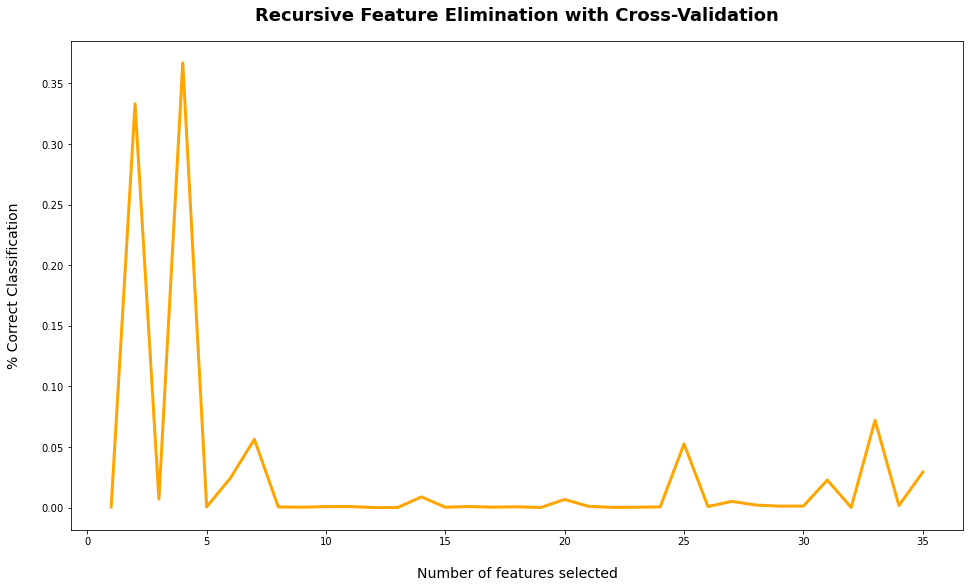

In [98]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(final_model.feature_importances_) + 1), final_model.feature_importances_, color='orange', linewidth=3)
plt.show()


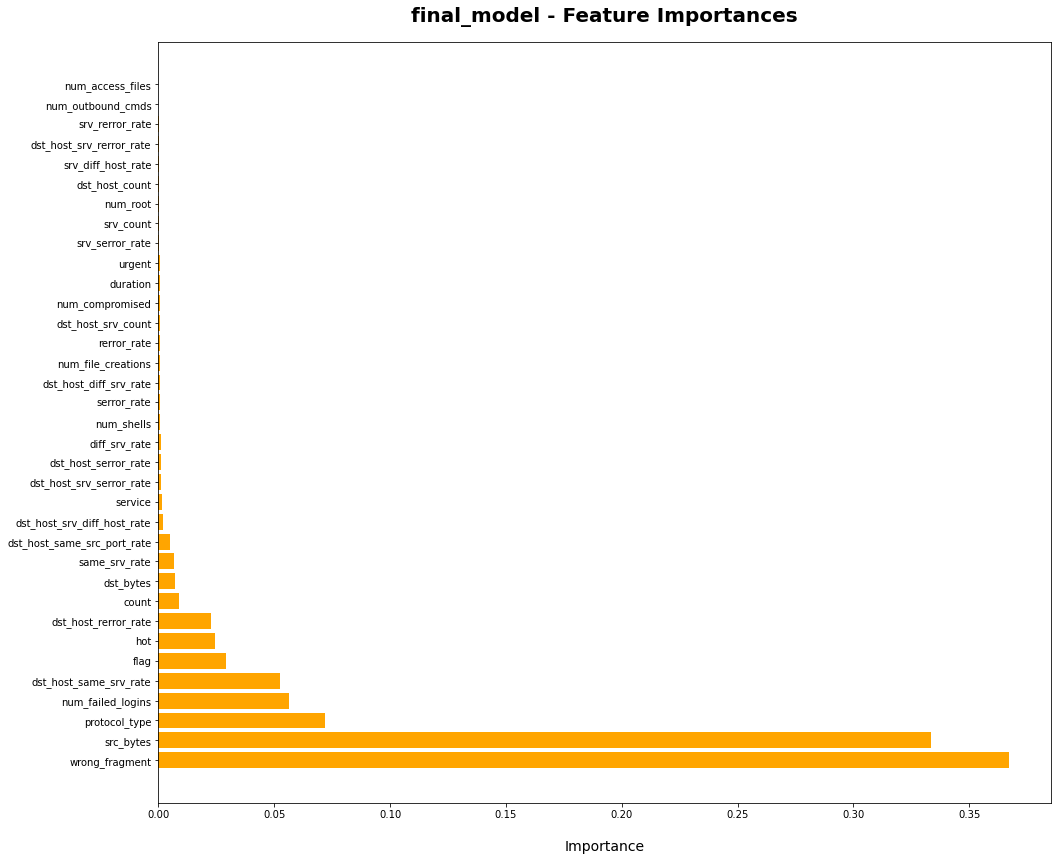

In [99]:
df = pd.DataFrame()
df['Features'] = X_train.columns
df['importance'] = final_model.feature_importances_

df = df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=df['Features'], width=df['importance'], color='orange')
plt.title('final_model - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [63]:
test_point_index = 66433

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 1
Predicted Class : 0


In [64]:
test_point_index = 20000

ac = np.array(list(df_test['class_label_bi']))

print("Actual Class :", ac[test_point_index])

print("Predicted Class :", y_test_pred[test_point_index])

Actual Class : 0
Predicted Class : 0


* I have tested with two data, One occasion it predicted correctly

## Pretty Table

In [1]:
print("Without Over Sampling or Under Sampling")

from prettytable import PrettyTable
  
table = PrettyTable(["Model","Tr_f1-score","Te_f1-score","Tr_precision" ,"Te_precision","Tr_recall","Te_recall","Tr_AUC","Te_AUC"])
  
table.add_row(["Logistic Regression","0.947","0.784","0.995", "0.966","0.904","0.659","0.989","0.926"])

table.add_row(["Random Forest","0.997","0.857","0.999", "0.983","0.995","0.760","0.999","0.978"])

table.add_row(["XGBOOST Without","0.999","0.882","0.999", "0.981","0.999","0.801","0.999","0.994"]) 

print(table)  

Without Over Sampling or Under Sampling
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+
|        Model        | Tr_f1-score | Te_f1-score | Tr_precision | Te_precision | Tr_recall | Te_recall | Tr_AUC | Te_AUC |
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+
| Logistic Regression |    0.947    |    0.784    |    0.995     |    0.966     |   0.904   |   0.659   | 0.989  | 0.926  |
|    Random Forest    |    0.997    |    0.857    |    0.999     |    0.983     |   0.995   |   0.760   | 0.999  | 0.978  |
|   XGBOOST Without   |    0.999    |    0.882    |    0.999     |    0.981     |   0.999   |   0.801   | 0.999  | 0.994  |
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+


In [2]:
print("With Under Sampling")

table = PrettyTable(["Model","Tr_f1-score","Te_f1-score","Tr_precision" ,"Te_precision","Tr_recall","Te_recall","Tr_AUC","Te_AUC"])

table.add_row(["Logistic Regression","0.997","0.875","0.999", "0.983","0.995","0.789","0.999","0.957"])

table.add_row(["Random Forest","0.997","0.857","0.999", "0.983","0.995","0.760","0.999","0.978"])

table.add_row(["XGBOOST","0.999","0.889","0.999", "0.975","0.999","0.817","0.999","0.984"]) 

print(table)

With Under Sampling
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+
|        Model        | Tr_f1-score | Te_f1-score | Tr_precision | Te_precision | Tr_recall | Te_recall | Tr_AUC | Te_AUC |
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+
| Logistic Regression |    0.997    |    0.875    |    0.999     |    0.983     |   0.995   |   0.789   | 0.999  | 0.957  |
|    Random Forest    |    0.997    |    0.857    |    0.999     |    0.983     |   0.995   |   0.760   | 0.999  | 0.978  |
|       XGBOOST       |    0.999    |    0.889    |    0.999     |    0.975     |   0.999   |   0.817   | 0.999  | 0.984  |
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+


In [3]:
print("With Over Sampling using RandomOverSampler")

table = PrettyTable(["Model","Tr_f1-score","Te_f1-score","Tr_precision" ,"Te_precision","Tr_recall","Te_recall","Tr_AUC","Te_AUC"])

table.add_row(["Logistic Regression","0.995","0.795","0.954", "0.911","0.956","0.705","0.991","0.940"])

table.add_row(["Random Forest","0.999","0.881","0.999", "0.981","0.998","0.799","0.999","0.969"])

table.add_row(["XGBOOST","0.999","0.892","0.999", "0.981","1.0","0.818","0.999","0.993"]) 

print(table)

With Over Sampling using RandomOverSampler
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+
|        Model        | Tr_f1-score | Te_f1-score | Tr_precision | Te_precision | Tr_recall | Te_recall | Tr_AUC | Te_AUC |
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+
| Logistic Regression |    0.995    |    0.795    |    0.954     |    0.911     |   0.956   |   0.705   | 0.991  | 0.940  |
|    Random Forest    |    0.999    |    0.881    |    0.999     |    0.981     |   0.998   |   0.799   | 0.999  | 0.969  |
|       XGBOOST       |    0.999    |    0.892    |    0.999     |    0.981     |    1.0    |   0.818   | 0.999  | 0.993  |
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+


In [4]:
print("With Over Sampling using SMOTETomek")

table = PrettyTable(["Model","Tr_f1-score","Te_f1-score","Tr_precision" ,"Te_precision","Tr_recall","Te_recall","Tr_AUC","Te_AUC"])

table.add_row(["Logistic Regression","0.965","0.790","0.989", "0.892","0.943","0.67","0.991","0.944"])

table.add_row(["Random Forest","0.999","0.876","0.999", "0.981","0.999","0.792","0.999","0.983"]) #final 

table.add_row(["XGBOOST","0.999","0.901","0.999", "0.980","1.0","0.834","0.999","0.994"]) 

print(table)

With Over Sampling using SMOTETomek
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+
|        Model        | Tr_f1-score | Te_f1-score | Tr_precision | Te_precision | Tr_recall | Te_recall | Tr_AUC | Te_AUC |
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+
| Logistic Regression |    0.965    |    0.790    |    0.989     |    0.892     |   0.943   |    0.67   | 0.991  | 0.944  |
|    Random Forest    |    0.999    |    0.876    |    0.999     |    0.981     |   0.999   |   0.792   | 0.999  | 0.983  |
|       XGBOOST       |    0.999    |    0.901    |    0.999     |    0.980     |    1.0    |   0.834   | 0.999  | 0.994  |
+---------------------+-------------+-------------+--------------+--------------+-----------+-----------+--------+--------+


# Conclusion

* In this case study, the data is imbalanced, so the Recall score/Sensitivity score will be the most effective performance metric to evaluate the best model.



* In our case, we got the best recall score on the Random Forest model With Over Sampling the imbalanced data using SMOTETomek. So we will consider this model as my final model for binary classification.





* Further, we can try with some deep learning algorithms to improve our prediction. Currently, we deploy the Random Forest model With Over Sampling the imbalanced data using the SMOTETomek model as our final model in the production server.

